# Is Joe Biden more acceptable to moderate voters that made him win in 2020 presidential election? 

# Project 1

## Introduction 

As we know, President Joseph R. Biden defeated his Republican counterpart Donald J. Trump in the 2020 United States presidential election. Some advocates of President Biden claim that **`it is Joe Biden’s charisma for moderate voters that helped the Democratic Party take over the White House (Kabaservice, 2019)`**. In this report, two investigations will be conducted to find out whether this claim is true using data from Kaggle.

Generally speaking, the results of U.S. presidential elections are mainly depend on candidates and party popularity, other variables might also influence presidential elections, but they are either too small or influence the elections indirectly by influencing the two dominant variables.

We know the result of the 2020 election and one X variable (party popularity). Using these, we can infer the other X variable (Biden's performance among moderate voters) to see if his charisma helped the Democratic Party win. So in this case:

- **Y-variable: Result of the US presidential election**
- **Two X-variables: Quality of candidates and Popularity of the party candidate affiliated to**

If we know Biden's vote share and the popularity of the Democratic Party, we can infer how much of Biden's success was due to his personal charisma. Since the popularity of the Democratic Party in 2020 is very difficult to be evaluated accurately, we are going to congressional Democrats' vote share to represent this, as the sample size is large enough to reflect the overall popularity of Democrats. 

Since the popularity of the Democratic Party in 2020 is very difficult to be evaluated accurately, we used two different ways to represent the popularity of the candidates’ party in 2020 so that we evaluate the popularity of the party more objectively. 

- **1. by vote share of the Democratic party in the Senate race by county**
- **2. the vote share of the Democratic party in the House race by state**

Therefore, we need to carry out two investigations using two methods to represent the popularity of the parties in two different ways.

We'll analyze our research question by subgrouping based on GDP per capita to compare Biden's performance with House Democratic candidates in **'poor' and 'rich' moderate states**. Our analysis suggests that Biden is more popular in 'rich' states. We'll continue our investigation of Biden's performance in rich and poor areas to gain deeper socio-economic insights. We'll also analyze President Biden and Senate Democrats' performance in rich and poor counties and compare their popularity among different income groups. We used maps to analyze our research question from multiple perspectives. Our analysis shows that Biden promoted the Democratic Party in Rust Belt, Georgia, and Nevada, but underperformed in most moderate states. Biden may have promoted the performance of the Democratic candidate among poorer moderate voters but dragged down the party among richer voters. He did not boost the performance of his party among moderate voters living in rural areas as some people claimed.

In our findings, Democratic House and Senate candidates generally performed better than President Biden in moderate states in 2020. This indicates that the Democratic party's overall popularity in moderate states is higher than Biden's. Therefore, it is very likely that party affiliation, instead of his charisma, contributes more to Joe Biden's winning in 2020.

This paper investigated an important question, whether Joe Biden or the Democratic Party contribute more to their winning among moderate voters, that has not been fully answered in existing literature. The findings of this report can add to the understanding of how presidential candidates win elections in the United States. Additionally, this paper's subgroup analysis based on GDP per capita provides a nuanced understanding of how Biden's performance varied in different socioeconomic contexts. This can add to the literature on the impact of socioeconomic factors on presidential elections. Moreover, the use of data from Kaggle and visualization techniques can contribute to the literature on data analysis and visualization methods in political science research.

In the following sections, we will delve deeper into our question and provide a more specific analysis.




## Setting up the project

In [2]:
!pip install -q qeds
!pip install -q matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
from bs4 import BeautifulSoup

import matplotlib.colors as mplc
import statsmodels.formula.api as sm
from pandas_datareader import DataReader
import matplotlib.patches as patches
import seaborn as sns

!pip install -q plotly_express
import time
from datetime import datetime
import plotly_express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
todays_date = datetime.fromtimestamp(time.time()).strftime("%Y-%m-%d")

In [3]:
#import needed data from local repository
president_county_candidate = pd.read_csv('/Users/kelseycui/Desktop/president_county_candidate.csv')
house_candidate = pd.read_csv('/Users/kelseycui/Desktop/house_candidate.csv')
president_county_candidate = pd.read_csv('/Users/kelseycui/Desktop/president_county_candidate.csv')
senate_county_candidate = pd.read_csv('/Users/kelseycui/Desktop/senate_county_candidate.csv')
world_country_and_usa_states_latitude_and_longitude_values = pd.read_csv('/Users/kelseycui/Desktop/world_country_and_usa_states_latitude_and_longitude_values.csv')
house_state = pd.read_csv('/Users/kelseycui/Desktop/house_state.csv')
president_1976_2020 = pd.read_csv('/Users/kelseycui/Desktop/1976-2020-president.csv')
df_senate = pd.read_csv('/Users/kelseycui/Desktop/1976-2020-senate.csv', encoding='ISO-8859-1')

## Data cleaning (include 5 parts)

###  Part 1: Investigation about Democratic senate candidates vote share  & Democratic presidential candidate Joe Biden vote share over moderate counties
#### a. Find the vote share of Democratic senate candidates over county

In [8]:
#Firstly, we find total votes of senate candidates in each county, 
#which is the denominator of Demcratic ratio over counties
county_total_votes = senate_county_candidate.\
groupby('county')['total_votes'].sum() 
county_total_votes = county_total_votes.reset_index().\
rename(columns={'total_votes':'county_total_votes'})
county_total_votes.head()

,county,county_total_votes
0,Abbeville County,4414
1,Abbot,111
2,Abington,4190
3,Acadia Parish,5859
4,Accomack County,7939


In [9]:
#And then, we find sum of votes of Democratic senate candidates in each county, 
#which is the numerator of Democratic ratio over county
dem_county = senate_county_candidate['party'].str.contains('DEM')  
dem_candidate_votes = senate_county_candidate[dem_county].\
groupby('county').sum('total_votes') 
dem_candidate_votes = dem_candidate_votes.\
rename(columns={'total_votes':'dem_total_votes'})
dem_candidate_votes = dem_candidate_votes['dem_total_votes'].to_frame()
dem_candidate_votes.reset_index().head()

,county,dem_total_votes
0,Abbeville County,4232
1,Abbot,93
2,Acadia Parish,4376
3,Accomack County,7939
4,Acton,516


In [10]:
#Lastly, we calcuate the Democratic senate candidates votes share over county, 
#which is the Democratic ratio over county
dem_county_ratio = pd.merge(county_total_votes, \
                            dem_candidate_votes, on='county', how='left')
dem_county_ratio['dem_ratio'] = \
dem_county_ratio['dem_total_votes'] / dem_county_ratio['county_total_votes']
dem_county_ratio=dem_county_ratio.dropna()
dem_county_ratio.head()

,county,county_total_votes,dem_total_votes,dem_ratio
0,Abbeville County,4414,4232.0,0.958768
1,Abbot,111,93.0,0.837838
3,Acadia Parish,5859,4376.0,0.746885
4,Accomack County,7939,7939.0,1.000000
5,Acton,3638,516.0,0.141836


In [11]:
#To analysis, 
#we filter the Democratic senator candidates votes shares between 0.3 to 0.7
#(since data is incomplete, we use this range to keep suffcient observation amount)
#and define these counties as moderate 
dem_ratio_filtered = dem_county_ratio[(dem_county_ratio['dem_ratio'] > 0.3) \
                                      & (dem_county_ratio['dem_ratio'] < 0.7)]
dem_ratio_filtered = \
dem_ratio_filtered.rename(columns={'dem_ratio': 'dem_ratio_county'})
dem_ratio_filtered.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county
57,Antelope County,751,354.0,0.471372
63,Appling County,7685,3414.0,0.444242
77,Arthur County,63,21.0,0.333333
92,Atkinson County,2782,1525.0,0.548167
97,Auburn,12271,6992.0,0.569799



#### b. Find Democratic presidential candidate Joe Biden's vote share over moderate counties


In [12]:
# Firstly, calculate the numerator, which is Biden's votes in each county
biden_votes_county = \
president_county_candidate[president_county_candidate['candidate'] == 'Joe Biden']
biden_votes_county = \
biden_votes_county.groupby('county')['total_votes'].sum()
biden_votes_county = \
biden_votes_county.reset_index().rename(columns={'total_votes':'county_biden_votes'})
biden_votes_county.head()

,county,county_biden_votes
0,Abbeville County,4101
1,Abbot,121
2,Abington,5209
3,Acadia Parish,5443
4,Accomack County,7578


In [13]:
# Then, calculate the denominator, 
#which is the total votes toward all president candidates in each county
total_votes_county = president_county_candidate.groupby('county').sum().reset_index()
total_votes_county = \
total_votes_county.rename(columns={'total_votes':'county_total_votes'}).drop(columns={'won'})
total_votes_county.head()

,county,county_total_votes
0,Abbeville County,12433
1,Abbot,417
2,Abington,9660
3,Acadia Parish,28425
4,Accomack County,16962


In [14]:
# Finally, calculate the Biden's votes share by county
biden_votes_share_county = \
biden_votes_county.merge(total_votes_county, on='county')
biden_votes_share_county['biden_vote_share_county'] = \
biden_votes_county['county_biden_votes'] / \
total_votes_county['county_total_votes'] 
biden_votes_share_county = biden_votes_share_county
biden_votes_share_county.head()

,county,county_biden_votes,county_total_votes,biden_vote_share_county
0,Abbeville County,4101,12433,0.329848
1,Abbot,121,417,0.290168
2,Abington,5209,9660,0.539234
3,Acadia Parish,5443,28425,0.191486
4,Accomack County,7578,16962,0.446763


In [15]:
#Now we merge two tables based on county in consequence of visualization

#biden_votes_share_county = biden_votes_share_county[(biden_votes_share_county['biden_vote_share_county'] > 0.45) & (biden_votes_share_county['biden_vote_share_county'] < 0.55)]
merged_table_county = pd.merge(biden_votes_share_county,dem_ratio_filtered, on='county' )
merged_table_county.head()



,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county
0,Antelope County,452,3583,0.126151,751,354.0,0.471372
1,Appling County,1784,8390,0.212634,7685,3414.0,0.444242
2,Arthur County,21,285,0.073684,63,21.0,0.333333
3,Atkinson County,825,3155,0.261490,2782,1525.0,0.548167
4,Auburn,13721,26416,0.519420,12271,6992.0,0.569799


### Part 2: Investigation about Democratic house candidates vote share & Democratic presidential candidate Joe Biden's vote share over moderate states

#### a. Find the vote share of Democratic house candidates over moderate states

In [16]:
#Firstly, to assure we can group by state, only keep the name of state (keep the first word). 
state = house_candidate['district'].str.split().str[0]
state.to_frame().rename(columns={'district':'state'})
house_candidate['state'] = state

#And then, find the total votes of all house candidate in each state
total_votes_state = house_candidate.groupby('state').sum()['total_votes']
total_votes_state = \
total_votes_state.to_frame().rename(columns={'total_votes':'state_total_votes'})
total_votes_state.head()

,state_total_votes
state,
Alabama’s,2033209
Alaska,353165
Arizona’s,3268249
Arkansas’s,1179396
California’s,16723953


In [17]:
#Filter the Democratic house candidates
dem_state = house_candidate['party'].str.contains('DEM')
dem_state

0        True
1       False
2       False
3       False
4       False
        ...  
1210     True
1211    False
1212     True
1213    False
1214     True
Name: party, Length: 1215, dtype: bool

In [18]:
#Only keep these True since they're democrats
dem_state_vote = house_candidate[dem_state]
dem_state_vote.head()

,district,candidate,party,total_votes,won,state
0,Delaware at large,Lisa Blunt Rochester,DEM,281382,True,Delaware
5,Florida’s 1st district,Phil Ehr,DEM,149172,False,Florida’s
10,Florida’s 3rd district,Adam Christensen,DEM,167326,False,Florida’s
12,Florida’s 4th district,Donna Deegan,DEM,196423,False,Florida’s
14,Florida’s 5th district,Al Lawson,DEM,219463,True,Florida’s


In [19]:
#Next, find sum of votes from Democratic house candidates in each state
dem_votes_state = house_candidate[dem_state].groupby('state').sum()['total_votes']
dem_votes_state = dem_votes_state.to_frame().rename(columns={'total_votes':'dem_total_votes'})
dem_votes_state.head()

,dem_total_votes
state,
Alabama’s,608809
Alaska,159856
Arizona’s,1629318
Arkansas’s,330485
California’s,11083738


In [20]:
#Calculate the democratic house candidates votes share over state
dem_state_ratio = \
dem_votes_state['dem_total_votes'].div(total_votes_state['state_total_votes'], axis= 0)
dem_state_ratio = dem_state_ratio.to_frame().rename(columns={0:'dem_state_ratio'})
dem_state_ratio.head()


,dem_state_ratio
state,
Alabama’s,0.299433
Alaska,0.452638
Arizona’s,0.498529
Arkansas’s,0.280215
California’s,0.662746


In [21]:
#Lastly, filter the states with state democratic ratio between 0.4 to 0.6 to have moderate states

# Convert 'dem_state_ratio' to float
dem_state_ratio['dem_state_ratio'] = dem_state_ratio['dem_state_ratio'].astype(float)

# Filter the states with democratic ratio between 0.4 and 0.6
dem_state_ratio_selected=\
dem_state_ratio[(dem_state_ratio['dem_state_ratio'] >= 0.45) \
                & (dem_state_ratio['dem_state_ratio'] <= 0.55)].dropna()

# Rename the 'dem_state_ratio' column to 'dem_house_share'
dem_state_ratio_selected = \
dem_state_ratio_selected.rename(columns={'dem_state_ratio': 'dem_house_share'})

# Reset the index
dem_state_ratio_selected = dem_state_ratio_selected.reset_index()
dem_state_ratio_selected.head()

,state,dem_house_share
0,Alaska,0.452638
1,Arizona’s,0.498529
2,Colorado’s,0.530515
3,Florida’s,0.472269
4,Georgia’s,0.489994



#### b. Find Democratic presidential candidate Joe Biden's vote share over moderate state

In [22]:
#Firstly, find the total votes of all president candidate in each state
state_total_votes = president_county_candidate.groupby('state')['total_votes'].sum()
state_total_votes = state_total_votes.reset_index()
state_total_votes.rename(columns={'total_votes':'state_total_votes'})
state_total_votes.head()

,state,total_votes
0,Alabama,2323304
1,Alaska,391346
2,Arizona,3387326
3,Arkansas,1219069
4,California,17495906


In [23]:
#Secondly, find Democratic president candidate Joe Biden's votes in each state
biden_votes_state = \
president_county_candidate[president_county_candidate['candidate'] \
                                               == \
                           'Joe Biden'].groupby('state')['total_votes'].sum()
biden_votes_state = biden_votes_state.reset_index()
biden_votes_state.head()

,state,total_votes
0,Alabama,849648
1,Alaska,153405
2,Arizona,1672143
3,Arkansas,423932
4,California,11109764


In [24]:
#Finally, we get the Democratic president candidate Biden's vote share over state
biden_votes_share = biden_votes_state.merge(state_total_votes, on='state')
biden_votes_share['biden_vote_share'] = \
biden_votes_share['biden_vote_share'] = \
biden_votes_share['total_votes_x'].div(biden_votes_share['total_votes_y'], axis= 0)
biden_votes_share.head()

,state,total_votes_x,total_votes_y,biden_vote_share
0,Alabama,849648,2323304,0.365707
1,Alaska,153405,391346,0.391993
2,Arizona,1672143,3387326,0.493647
3,Arkansas,423932,1219069,0.347751
4,California,11109764,17495906,0.634992


In [25]:
dem_state_ratio = dem_state_ratio.reset_index()
dem_state_ratio.head()

,state,dem_state_ratio
0,Alabama’s,0.299433
1,Alaska,0.452638
2,Arizona’s,0.498529
3,Arkansas’s,0.280215
4,California’s,0.662746


In [26]:
dem_state_ratio_selected_2 = dem_state_ratio_selected
dem_state_ratio_selected_2['state'] =dem_state_ratio_selected_2['state'].str[:4] 
dem_state_ratio_selected_2.head()

,state,dem_house_share
0,Alas,0.452638
1,Ariz,0.498529
2,Colo,0.530515
3,Flor,0.472269
4,Geor,0.489994


In [27]:
#We take the first four letters of state to merge
biden_votes_share_2 = biden_votes_share
biden_votes_share_2['state']=biden_votes_share_2['state'].str[:4]
biden_votes_share_2.head()

,state,total_votes_x,total_votes_y,biden_vote_share
0,Alab,849648,2323304,0.365707
1,Alas,153405,391346,0.391993
2,Ariz,1672143,3387326,0.493647
3,Arka,423932,1219069,0.347751
4,Cali,11109764,17495906,0.634992


In [28]:
#Merge two tables for visualization
merged_table_state = pd.merge(biden_votes_share, dem_state_ratio_selected, on='state')
merged_table_state.head()

,state,total_votes_x,total_votes_y,biden_vote_share,dem_house_share
0,Alas,153405,391346,0.391993,0.452638
1,Ariz,1672143,3387326,0.493647,0.498529
2,Colo,1804352,3256953,0.554000,0.530515
3,Flor,5297045,11067456,0.478615,0.472269
4,Geor,2473633,4997716,0.494953,0.489994


### Part 3: Cleaning data for creating maps and histograms

In [29]:
#Find the total votes of Democrats and Republicans in each states so that we can have the votes share of democrats

df_president_state = pd.read_csv('/Users/kelseycui/Desktop/president_county_candidate.csv')

# Select rows where party is Democrat or Republican
df_president_state = df_president_state[df_president_state['party'].isin(['DEM', 'REP'])]

# Group the DataFrame by state and party, and compute the sum of the numerical columns
df_president_state = df_president_state.groupby(['state', 'party']).sum()

# Reshape the DataFrame by unstacking the 'party' index level
df_president_state = df_president_state.unstack()

# Reset the index to make 'state' a column again
df_president_state = df_president_state.reset_index()
df_president_state.head()

state total_votes          won    
party                     DEM      REP DEM REP
0         Alabama      849648  1441168  13  54
1          Alaska      153405   189892  17  20
2         Arizona     1672143  1661686   5  10
3        Arkansas      423932   760647   8  67
4      California    11109764  6005961  35  23

In [128]:
#Find the moderate states to check the demograts' votes displayed in map

# Read the CSV file into a DataFrame
state_codes = pd.read_csv('/Users/kelseycui/Desktop/world_country_and_usa_states_latitude_and_longitude_values.csv')

# Select only the 'usa_state' and 'usa_state_code' columns
state_codes = state_codes[['usa_state', 'usa_state_code']]

# Rename the 'usa_state' column to 'state'
state_codes = state_codes.rename(columns={'usa_state': 'state'})

# Merge the state_codes DataFrame with df_president_county on the 'state' column
df_president_state = df_president_state.merge(state_codes, on='state')

# Compute the percentage of Democrat votes
df_president_state['percent_democrat'] = \
df_president_state[('total_votes', 'DEM')] * 100 / (df_president_state[('total_votes', 'REP')] + \
                                                    df_president_state[('total_votes', 'DEM')])

# Remove any duplicated columns
df_president_state = df_president_state.loc[:, ~df_president_state.columns.duplicated()]

# Output the final DataFrame
df_president_state

#Pick only moderate states 
df_president_state_moderate = df_president_state.iloc[[1,2,5,9,10,15,22,23,28,33,34,38,46,49]]
df_president_state_moderate.head()


,state,"(state, )","(total_votes, DEM)","(total_votes, REP)","(won, DEM)","(won, REP)",usa_state_code_x,percent_democrat,usa_state_code_y
1,Alaska,Alaska,153405,189892,17,20,AK,44.685797,AK
2,Arizona,Arizona,1672143,1661686,5,10,AZ,50.156832,AZ
5,Colorado,Colorado,1804352,1364607,24,40,CO,56.938319,CO
9,Florida,Florida,5297045,5668731,12,55,FL,48.305245,FL
10,Georgia,Georgia,2473633,2461854,30,129,GA,50.119330,GA


In [31]:
#Find the democratic house candidates vote share and democratic president candidate vote share 

merged_table_state_use = merged_table_state
merged_table_state_use['state'] = merged_table_state_use['state'].str[:4]
merged_table_state_use = merged_table_state_use.rename(columns={'state': 'usa_state'})
merged_table_state_use.head()

,usa_state,total_votes_x,total_votes_y,biden_vote_share,dem_house_share
0,Alas,153405,391346,0.391993,0.452638
1,Ariz,1672143,3387326,0.493647,0.498529
2,Colo,1804352,3256953,0.554000,0.530515
3,Flor,5297045,11067456,0.478615,0.472269
4,Geor,2473633,4997716,0.494953,0.489994


In [32]:
#Clean the table to keep info to draw the boxplot
merged_table_state_boxplot = merged_table_state
merged_table_state_boxplot = merged_table_state_boxplot[['state', 'biden_vote_share', 'dem_house_share']]
merged_table_state_boxplot.head()

,state,biden_vote_share,dem_house_share
0,Alas,0.391993,0.452638
1,Ariz,0.493647,0.498529
2,Colo,0.554000,0.530515
3,Flor,0.478615,0.472269
4,Geor,0.494953,0.489994


In [33]:
#Find the total votes of each state and only keep the first four letters of each state so that we can merge on that

# Select rows from the house_candidate DataFrame for the Democratic states
dem_state_vote = house_candidate.loc[dem_state, :].copy()  # add .copy() to avoid SettingWithCopyWarning

# Extract the first four characters from the 'district' column
dem_state_vote.loc[:, 'district'] = dem_state_vote['district'].str[:4]  # use .loc[row_indexer, col_indexer] = value instead of chained indexing

# Group the DataFrame by 'district' and sum the 'total_votes' column
dem_state_vote = dem_state_vote.groupby('district')['total_votes'].sum().reset_index()

# Rename the 'district' column to 'usa_state'
dem_state_vote = dem_state_vote.rename(columns={'district': 'usa_state'})
dem_state_vote.head()


,usa_state,total_votes
0,Alab,608809
1,Alas,159856
2,Ariz,1629318
3,Arka,330485
4,Cali,11083738


In [34]:
#Find the total votes of each state and only keep the first four letters of each state so that we can merge on that

# Select rows from the house_candidate DataFrame for the Democratic states
dem_state_vote = house_candidate.loc[dem_state, :].copy()  # add .copy() to avoid SettingWithCopyWarning

# Extract the first four characters from the 'district' column
dem_state_vote.loc[:, 'district'] = dem_state_vote['district'].str[:4]  # use .loc[row_indexer, col_indexer] = value instead of chained indexing

# Group the DataFrame by 'district' and sum the 'total_votes' column
dem_state_vote = dem_state_vote.groupby('district')['total_votes'].sum().reset_index()

# Rename the 'district' column to 'usa_state'
dem_state_vote = dem_state_vote.rename(columns={'district': 'usa_state'})
dem_state_vote.head()


,usa_state,total_votes
0,Alab,608809
1,Alas,159856
2,Ariz,1629318
3,Arka,330485
4,Cali,11083738


In [35]:
#Merge dem_state_vote and merged_table_state_use to display only USA states 
#and their democratic house candidates vote share

merged_usa = pd.merge(dem_state_vote, merged_table_state_use, on = 'usa_state')
merged_usa= merged_usa.loc[:, ['usa_state', 'dem_house_share']]
merged_usa.head()

,usa_state,dem_house_share
0,Alas,0.452638
1,Ariz,0.498529
2,Colo,0.530515
3,Flor,0.472269
4,Geor,0.489994


In [36]:
#Only keep the first four letters of USA state so that we can merge state_codes and merged_usa on the usa-state
state_codes = pd.read_csv('/Users/kelseycui/Desktop/world_country_and_usa_states_latitude_and_longitude_values.csv')
state_codes['usa_state']=state_codes['usa_state'].str[:4]
state_codes.dropna().head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alab
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arka
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,Cali


In [37]:
#Merge the state_codes and merged_usa to draw the map of Democratic House Candidate Votes share by state
merged_df = pd.merge(state_codes, merged_usa, on='usa_state')
merged_df.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state,dem_house_share
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alas,0.452638
1,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Ariz,0.498529
2,AL,41.153332,20.168331,Albania,CO,39.550051,-105.782067,Colo,0.530515
3,AQ,-75.250973,-0.071389,Antarctica,FL,27.664827,-81.515754,Flor,0.472269
4,AR,-38.416097,-63.616672,Argentina,GA,32.157435,-82.907123,Geor,0.489994


In [38]:
#Find data in 2016 and the vote share of Democratic senator candidate in moderate states
df_senate2 = df_senate[df_senate['party_simplified'] == 'DEMOCRAT']
df_senate2 = df_senate2[df_senate2['year'] == 2016]
df_senate2['dem_vote_share'] = df_senate2['candidatevotes'] / df_senate2['totalvotes']
df_senate2 = df_senate2[df_senate2['state'].isin(['ALASKA', 'ARIZONA', 'COLORADO', 'FLORIDA',\
                                            'GEORGIA', 'LOWA', 'MICHIGAN', 'MINNESOTA', 'NEVADA',\
                                            'NORTH CAROLINA', 'NORTH DAKATA','PENNSYLVANIA', \
                                            'VIRGINIA', 'WISCONSIN'])].reset_index()
df_senate2.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,district,stage,...,candidate,party_detailed,writein,mode,candidatevotes,totalvotes,unofficial,version,party_simplified,dem_vote_share
0,3053,2016,ALASKA,AK,2,94,81,US SENATE,statewide,gen,...,RAY METCALFE,DEMOCRAT,False,total,36200,311441,False,20210114,DEMOCRAT,0.116234
1,3059,2016,ARIZONA,AZ,4,86,61,US SENATE,statewide,gen,...,ANN KIRKPATRICK,DEMOCRAT,False,total,1031245,2530730,False,20210114,DEMOCRAT,0.407489
2,3077,2016,COLORADO,CO,8,84,62,US SENATE,statewide,gen,...,MICHAEL F. BENNET,DEMOCRAT,False,total,1370710,2743023,False,20210114,DEMOCRAT,0.499708
3,3092,2016,FLORIDA,FL,12,59,43,US SENATE,statewide,gen,...,PATRICK MURPHY,DEMOCRAT,False,total,4122088,9301820,False,20210114,DEMOCRAT,0.443149
4,3102,2016,GEORGIA,GA,13,58,44,US SENATE,statewide,gen,...,JIM BARKSDALE,DEMOCRAT,False,total,1599726,3898605,False,20210114,DEMOCRAT,0.410333


In [39]:
#Find the data in 2016 and the vote share of Democratic president candidate vote share in moderate state
df_president = president_1976_2020[(president_1976_2020['year'] == 2016)]
df_president = df_president[df_president['candidate'] == 'CLINTON, HILLARY']
df_president['Clinton_vote_share'] = df_president['candidatevotes'] / df_president['totalvotes']

df_president= df_president[df_president['state'].isin(['ALASKA', 'ARIZONA', 'COLORADO', 'FLORIDA',\
                                            'GEORGIA', 'LOWA', 'MICHIGAN', 'MINNESOTA', 'NEVADA',\
                                            'NORTH CAROLINA', 'NORTH DAKATA','PENNSYLVANIA', \
                                              'VIRGINIA', 'WISCONSIN'])].reset_index()
df_president.head()

,index,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,Clinton_vote_share
0,3401,2016,ALASKA,AK,2,94,81,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,116454,318608,20210113,NaN,DEMOCRAT,0.365509
1,3408,2016,ARIZONA,AZ,4,86,61,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,1161167,2573165,20210113,NaN,DEMOCRAT,0.451260
2,3431,2016,COLORADO,CO,8,84,62,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,1338870,2780220,20210113,NaN,DEMOCRAT,0.481570
3,3468,2016,FLORIDA,FL,12,59,43,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,4504975,9420039,20210113,NaN,DEMOCRAT,0.478233
4,3475,2016,GEORGIA,GA,13,58,44,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,1877963,4114732,20210113,NaN,DEMOCRAT,0.456400


In [40]:
#Clear the data so that we can merge with de_senate
df_president_partial = df_president.loc[:, ['state', 'Clinton_vote_share']]
df_president_partial
#Clear this data so that we can merge with df_president_partial
df_senate2 = df_senate2.loc[:, ['state', 'dem_vote_share']]
df_senate2.head()

,state,dem_vote_share
0,ALASKA,0.116234
1,ARIZONA,0.407489
2,COLORADO,0.499708
3,FLORIDA,0.443149
4,GEORGIA,0.410333


In [41]:
#Merge two datas to draw the scatter plot 
merged_2016 = pd.merge(df_president_partial, df_senate2)
merged_2016.head()

,state,Clinton_vote_share,dem_vote_share
0,ALASKA,0.365509,0.116234
1,ARIZONA,0.451260,0.407489
2,COLORADO,0.481570,0.499708
3,FLORIDA,0.478233,0.443149
4,GEORGIA,0.456400,0.410333


## Part 4: data cleaning for project 3

In [42]:
#Web scrapting the data I needed from wike website
url = "https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income"

html = requests.get(url).content
soup = BeautifulSoup(html)

table = soup.find_all("table")[2] # select the third table on the page
Income_per_capita = pd.read_html(str(table))[0] # convert the table to a pandas dataframe
Income_per_capita = Income_per_capita.rename(columns={'County or county-equivalent': 'county'})
Income_per_capita.head()

,Rank,county,"State, federal district or territory",Per capitaincome,Medianhouseholdincome,Medianfamilyincome,Population,Number ofhouseholds
0,1,New York County,New York,"$76,592","$69,659","$86,553",1628706.0,759460.0
1,2,Arlington,Virginia,"$62,018","$103,208","$139,244",214861.0,94454.0
2,3,Falls Church City,Virginia,"$59,088","$120,000","$152,857",12731.0,5020.0
3,4,Marin,California,"$56,791","$90,839","$117,357",254643.0,102912.0
4,5,Santa Clara,California,"$56,248","$124,055","$124,055",1927852.0,640215.0


In [131]:
#Convert the type of income per capital from string into numeric
Income_per_capita['Per capitaincome'] = \
Income_per_capita['Per capitaincome'].astype(str).str.replace(',', '').str.replace('$', '', regex=False).astype(float)
Income_per_capita.head()

,county,Per capitaincome
0,New,76592.0
1,Arli,62018.0
2,Fall,59088.0
3,Mari,56791.0
4,Sant,56248.0


In [132]:
# To merge dem_ratio_filtered and income_per_capita, 
#we need to keep the common column'county' consistent with two tables
dem_ratio_filtered_slice = dem_ratio_filtered
dem_ratio_filtered_slice['county'] = dem_ratio_filtered_slice['county'].str.slice(stop=4)

dem_ratio_filtered_slice.head()


,county,county_total_votes,dem_total_votes,dem_ratio_county
57,Ante,751,354.0,0.471372
63,Appl,7685,3414.0,0.444242
77,Arth,63,21.0,0.333333
92,Atki,2782,1525.0,0.548167
97,Aubu,12271,6992.0,0.569799


In [133]:
# To merge dem_ratio_filtered and income_per_capita, 
#we need to keep the common column'county' consistent with two tables
Income_per_capita_slice = Income_per_capita
Income_per_capita_slice['county'] = Income_per_capita['county'].str.slice(stop=4)
Income_per_capita_slice.head()


,county,Per capitaincome
0,New,76592.0
1,Arli,62018.0
2,Fall,59088.0
3,Mari,56791.0
4,Sant,56248.0


In [134]:
#We merge two above tables to make the demcrats support rate and income per capita in the same table
new_merge = pd.merge(dem_ratio_filtered_slice, Income_per_capita_slice, on='county')
new_merge.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county,Per capitaincome
0,Ante,751,354.0,0.471372,25186.0
1,Appl,7685,3414.0,0.444242,19643.0
2,Arth,63,21.0,0.333333,17656.0
3,Atki,2782,1525.0,0.548167,15958.0
4,Baco,3527,1168.0,0.331160,18558.0


In [135]:
#Only keep the first four letters of table to merge with the above table so that finalize the table for scatter plot
biden_votes_share_county_slice = biden_votes_share_county
biden_votes_share_county_slice['county'] = biden_votes_share_county_slice['county'].str.slice(stop=4)
biden_votes_share_county_slice.head()


,county,county_biden_votes,county_total_votes,biden_vote_share_county
0,Abbe,4101,12433,0.329848
1,Abbo,121,417,0.290168
2,Abin,5209,9660,0.539234
3,Acad,5443,28425,0.191486
4,Acco,7578,16962,0.446763


In [136]:
#Final table with all data we need
final_merge = pd.merge(biden_votes_share_county_slice,new_merge, on='county')
final_merge.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county,Per capitaincome
0,Ante,452,3583,0.126151,751,354.0,0.471372,25186.0
1,Appl,478,915,0.522404,7685,3414.0,0.444242,19643.0
2,Appl,1784,8390,0.212634,7685,3414.0,0.444242,19643.0
3,Arth,21,285,0.073684,63,21.0,0.333333,17656.0
4,Atki,2299,5277,0.435664,2782,1525.0,0.548167,15958.0


In [137]:
#Find the average of income per capita among counties so that we can filter rich or poor counties
final_merge['Per capitaincome'].mean()

23968.661311146177

In [138]:
rich_county = final_merge.loc[final_merge['Per capitaincome'] >= 23838.873798076922]
rich_county

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county,Per capitaincome
0,Ante,452,3583,0.126151,751,354.0,0.471372,25186.0
8,Bann,43,411,0.104623,83,39.0,0.469880,25814.0
10,Bann,14682,39553,0.371198,83,39.0,0.469880,25814.0
12,Barr,3915,6964,0.562177,34017,20118.0,0.591410,25059.0
18,Barr,2512,4766,0.527067,34017,20118.0,0.591410,25059.0
...,...,...,...,...,...,...,...,...
6958,Wood,1005,7785,0.129094,671,305.0,0.454545,25961.0
6959,Wood,1005,7785,0.129094,671,305.0,0.454545,24922.0
6960,Wood,1005,7785,0.129094,671,305.0,0.454545,24042.0
6965,Wort,4206,14810,0.283997,10019,6453.0,0.644076,26187.0


In [143]:
poor_county

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county,Per capitaincome
1,Appl,478,915,0.522404,7685,3414.0,0.444242,19643.0
2,Appl,1784,8390,0.212634,7685,3414.0,0.444242,19643.0
3,Arth,21,285,0.073684,63,21.0,0.333333,17656.0
4,Atki,2299,5277,0.435664,2782,1525.0,0.548167,15958.0
5,Atki,825,3155,0.261490,2782,1525.0,0.548167,15958.0
...,...,...,...,...,...,...,...,...
6964,Wood,1005,7785,0.129094,671,305.0,0.454545,19087.0
6966,Wort,4206,14810,0.283997,10019,6453.0,0.644076,22967.0
6967,Wort,4206,14810,0.283997,10019,6453.0,0.644076,18551.0
6969,Wort,571,870,0.656322,10019,6453.0,0.644076,22967.0


In [142]:
#Define average income per capita below 23838.873798076922 as poor counties 
poor_county = final_merge.loc[final_merge['Per capitaincome'] < 23838.873798076922]
poor_county

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county,Per capitaincome
1,Appl,478,915,0.522404,7685,3414.0,0.444242,19643.0
2,Appl,1784,8390,0.212634,7685,3414.0,0.444242,19643.0
3,Arth,21,285,0.073684,63,21.0,0.333333,17656.0
4,Atki,2299,5277,0.435664,2782,1525.0,0.548167,15958.0
5,Atki,825,3155,0.261490,2782,1525.0,0.548167,15958.0
...,...,...,...,...,...,...,...,...
6964,Wood,1005,7785,0.129094,671,305.0,0.454545,19087.0
6966,Wort,4206,14810,0.283997,10019,6453.0,0.644076,22967.0
6967,Wort,4206,14810,0.283997,10019,6453.0,0.644076,18551.0
6969,Wort,571,870,0.656322,10019,6453.0,0.644076,22967.0


In [52]:
#Web scrapting 
density_url = "https://github.com/balsama/us_counties_data/blob/main/data/counties.csv"
response = requests.get(density_url)
soup_object = BeautifulSoup(response.content, 'html.parser')
data_table = soup_object.find_all('table', {'class': 'js-csv-data csv-data js-file-line-container'})[0]
population_density = pd.read_html(str(data_table))[0]
population_density = population_density.loc[:, ['County', 'Density']]
population_density = population_density.rename(columns={'County': 'county'} )
population_density.head()

,county,Density
0,Autauga County,99
1,Baldwin County,151
2,Barbour County,28
3,Bibb County,36
4,Blount County,92


In [53]:
#We need to slice the county to only keep the first four letters in order to merge with other tables
population_density_slice = population_density
population_density_slice['county'] = population_density_slice['county'].str.slice(stop=4)
population_density_slice.head()

,county,Density
0,Auta,99
1,Bald,151
2,Barb,28
3,Bibb,36
4,Blou,92


In [54]:
#We only need the moderate counties as we filtered before
moderate_county_density = pd.merge(dem_ratio_filtered, population_density_slice, on='county')
moderate_county_density.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county,Density
0,Ante,751,354.0,0.471372,7
1,Appl,7685,3414.0,0.444242,36
2,Arth,63,21.0,0.333333,1
3,Atki,2782,1525.0,0.548167,25
4,Baco,3527,1168.0,0.331160,39


In [55]:
#We slice the county in order to merge with other table
moderate_county_density_slice = moderate_county_density
moderate_county_density_slice['county'] = moderate_county_density_slice['county'].str.slice(stop=4)
moderate_county_density_slice.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county,Density
0,Ante,751,354.0,0.471372,7
1,Appl,7685,3414.0,0.444242,36
2,Arth,63,21.0,0.333333,1
3,Atki,2782,1525.0,0.548167,25
4,Baco,3527,1168.0,0.331160,39


In [56]:
#We slice the county in order to merge with other table
merged_table_county_slice = merged_table_county.copy()  # add .copy() to avoid SettingWithCopyWarning
merged_table_county_slice.loc[:, 'county'] = merged_table_county_slice['county'].str.slice(stop=4)  # use .loc[row_indexer, col_indexer] = value instead of chained indexing
merged_table_county_slice.head()


,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county
0,Ante,452,3583,0.126151,751,354.0,0.471372
1,Appl,1784,8390,0.212634,7685,3414.0,0.444242
2,Arth,21,285,0.073684,63,21.0,0.333333
3,Atki,825,3155,0.261490,2782,1525.0,0.548167
4,Aubu,13721,26416,0.519420,12271,6992.0,0.569799


In [57]:
#We need to merge table with democratic support rate and presidential support rate to draw a scatter plot
county_density_scatter = pd.merge(merged_table_county_slice,moderate_county_density_slice, on='county' )
county_density_scatter.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes_x,dem_ratio_county_x,county_total_votes,dem_total_votes_y,dem_ratio_county_y,Density
0,Ante,452,3583,0.126151,751,354.0,0.471372,751,354.0,0.471372,7
1,Appl,1784,8390,0.212634,7685,3414.0,0.444242,7685,3414.0,0.444242,36
2,Arth,21,285,0.073684,63,21.0,0.333333,63,21.0,0.333333,1
3,Atki,825,3155,0.261490,2782,1525.0,0.548167,2782,1525.0,0.548167,25
4,Baco,625,4667,0.133919,3527,1168.0,0.331160,3527,1168.0,0.331160,39


In [58]:
#Accounting to US Bureau Census, 
#areas with population density over 386 people per square mile are classified as urban areas. 
#Select the rural area with population density below 386 people per sq squared 
rural_area = county_density_scatter.loc[county_density_scatter['Density'] < 386]
rural_area.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes_x,dem_ratio_county_x,county_total_votes,dem_total_votes_y,dem_ratio_county_y,Density
0,Ante,452,3583,0.126151,751,354.0,0.471372,751,354.0,0.471372,7
1,Appl,1784,8390,0.212634,7685,3414.0,0.444242,7685,3414.0,0.444242,36
2,Arth,21,285,0.073684,63,21.0,0.333333,63,21.0,0.333333,1
3,Atki,825,3155,0.261490,2782,1525.0,0.548167,2782,1525.0,0.548167,25
4,Baco,625,4667,0.133919,3527,1168.0,0.331160,3527,1168.0,0.331160,39


## Part 5: data cleaning for the final project

In [59]:
#Import everything needed
!pip install -q linearmodels
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from linearmodels.iv import IV2SLS;


In [60]:
#To analysis, 
#we filter the Democratic senator candidates votes shares between 0.2 to 0.8
#(since data is incomplete, we use this range to keep suffcient observation amount)
#and define these counties as moderate 
test = dem_county_ratio[(dem_county_ratio['dem_ratio'] > 0.2) \
                                      & (dem_county_ratio['dem_ratio'] < 0.8)]
test = \
test.rename(columns={'dem_ratio': 'dem_ratio_county'})
test.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county
3,Acadia Parish,5859,4376.0,0.746885
28,Alfalfa County,359,262.0,0.729805
37,Allen Parish,2346,1746.0,0.744246
55,Anson,406,286.0,0.704433
57,Antelope County,751,354.0,0.471372


In [61]:
test_slice = test
test_slice['county'] = test['county'].str.slice(stop=4)
test_slice.head()

,county,county_total_votes,dem_total_votes,dem_ratio_county
3,Acad,5859,4376.0,0.746885
28,Alfa,359,262.0,0.729805
37,Alle,2346,1746.0,0.744246
55,Anso,406,286.0,0.704433
57,Ante,751,354.0,0.471372


In [62]:
#Now we merge two tables based on county in consequence of visualization

merged_table_county = pd.merge(biden_votes_share_county,test, on='county' )
merged_table_county.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county
0,Acad,5443,28425,0.191486,5859,4376.0,0.746885
1,Alfa,232,2262,0.102564,359,262.0,0.729805
2,Alle,24449,67094,0.364399,2346,1746.0,0.744246
3,Alle,15206,51357,0.296084,2346,1746.0,0.744246
4,Alle,3729,14279,0.261153,2346,1746.0,0.744246


In [63]:
regression_table1 = merged_table_county[['county', 'biden_vote_share_county','dem_ratio_county']]
regression_table1.to_csv('regression.csv', index=False)

In [64]:
# read the data into a Pandas data frame
df = pd.read_csv('/Users/kelseycui/Desktop/regression.csv')
df

,county,biden_vote_share_county,dem_ratio_county
0,Acad,0.191486,0.746885
1,Alfa,0.102564,0.729805
2,Alle,0.364399,0.744246
3,Alle,0.296084,0.744246
4,Alle,0.261153,0.744246
...,...,...,...
1481,Wood,0.129094,0.454545
1482,Wood,0.129094,0.772727
1483,Wood,0.129094,0.763649
1484,Wort,0.283997,0.644076


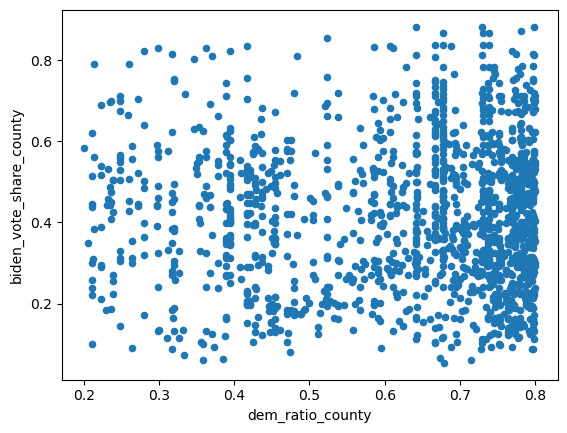

In [65]:

# Create scatter plot
regression_table1.plot.scatter(x='dem_ratio_county', y='biden_vote_share_county')

# Add trend line
#m, b = np.polyfit(data['dem_ratio_county'], data['biden_vote_share_county'], 1)
#plt.plot(data['dem_ratio_county'], m*data['dem_ratio_county'] + b, color='red')

# Show plot
plt.show()

### First regression: **`biden_vote_share_county = 0.4105+ 0.0065* dem_ratio_county`**

In [66]:
regression_table1 = regression_table1.dropna().copy()  # create a copy of the DataFrame
regression_table1.loc[:, 'intercept'] = [1] * len(regression_table1)  # use .loc to modify the copy


In [67]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer  # import the Stargazer module
from IPython.core.display import HTML

reg1 = sm.OLS(endog=regression_table1['biden_vote_share_county'], exog=regression_table1[['dem_ratio_county', 'intercept']],
             missing = 'drop')
res1 = reg1.fit()


stargazer = Stargazer([res1])
HTML(stargazer.render_html())

In [68]:
from linearmodels.iv import IV2SLS  # import the IV2SLS class

iv = IV2SLS(dependent=regression_table1['biden_vote_share_county'],
            exog=regression_table1[['dem_ratio_county']],
            endog=regression_table1[['intercept']],
            instruments=regression_table1[['intercept']]
           ).fit(cov_type='unadjusted')  # specify exog, endog and instruments as data frames

print(iv.summary)  # call the summary method to print the regression results


                             IV-2SLS Estimation Summary                            
Dep. Variable:     biden_vote_share_county   R-squared:                   3.729e-05
Estimator:                         IV-2SLS   Adj. R-squared:                -0.0006
No. Observations:                     1484   F-statistic:                    0.0553
Date:                     Wed, Apr 12 2023   P-value (F-stat)                0.8140
Time:                             17:34:42   Distribution:                  chi2(1)
Cov. Estimator:                 unadjusted                                         
                                                                                   
                                Parameter Estimates                                 
                  Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
------------------------------------------------------------------------------------
dem_ratio_county     0.0065     0.0274     0.2353     0.8140     -0.0473 

In [69]:
from linearmodels.iv import IV2SLS  # import the IV2SLS class

iv = IV2SLS(dependent=regression_table1['biden_vote_share_county'],
            exog=regression_table1[['dem_ratio_county']],
            endog=regression_table1[['intercept']],
            instruments=regression_table1[['intercept']]
           ).fit(cov_type='unadjusted')  # specify exog, endog and instruments as data frames

print("Regression formula: y = {:.4f}x + {:.4f}".format(iv.params['dem_ratio_county'], iv.params['intercept']))


Regression formula: y = 0.0065x + 0.4105


### Second regression:  **`biden_vote_share_county =  0.4101 + (0.0065)(dem_ratio_county) + 0.0004 (dem_ratio_county*rich_county) + 0.0004(rich_county)`**

In [70]:
poor_county[['county', 'biden_vote_share_county', 'dem_ratio_county']].head()

,county,biden_vote_share_county,dem_ratio_county
1,Appl,0.522404,0.444242
2,Appl,0.212634,0.444242
3,Arth,0.073684,0.333333
4,Atki,0.435664,0.548167
5,Atki,0.261490,0.548167


In [71]:
regression_table1 = regression_table1.copy()  # create a copy of the DataFrame
regression_table1.loc[:, 'intercept'] = [1] * len(regression_table1)  # use .loc to modify the copy


In [72]:
regression_table1_slice = regression_table1
regression_table1_slice['county'] = regression_table1['county'].str.slice(stop=4)
regression_table1_slice.head()

,county,biden_vote_share_county,dem_ratio_county,intercept
0,Acad,0.191486,0.746885,1
1,Alfa,0.102564,0.729805,1
2,Alle,0.364399,0.744246,1
3,Alle,0.296084,0.744246,1
4,Alle,0.261153,0.744246,1


In [73]:
# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise
regression_table1_slice['rich_county'] = (regression_table1_slice['county'].isin(poor_county['county']).astype(int))

# include dem_ratio_county and its interaction with rich_county in the exog matrix
regression_table1_slice['interaction'] = regression_table1_slice['rich_county'] * regression_table1_slice['dem_ratio_county']
exog = regression_table1_slice[['rich_county', 'dem_ratio_county', 'interaction']]

# run the regression with the updated exog matrix
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()

# print the results using stargazer
stargazer = Stargazer([res1])
HTML(stargazer.render_html())


In [74]:
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'rich_county']])
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()
print(res1.summary())


                               OLS Regression Results                              
Dep. Variable:     biden_vote_share_county   R-squared:                       0.012
Model:                                 OLS   Adj. R-squared:                  0.010
Method:                      Least Squares   F-statistic:                     6.087
Date:                     Wed, 12 Apr 2023   Prob (F-statistic):           0.000409
Time:                             17:34:42   Log-Likelihood:                 480.40
No. Observations:                     1484   AIC:                            -952.8
Df Residuals:                         1480   BIC:                            -931.6
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [75]:
formula = "biden_vote_share_county = 0.4418 - 0.0673 * dem_ratio_county + 0.1712 * (dem_ratio_county * interaction) - 0.0804 * rich_county"
print("Third regression: " + formula)


Third regression: biden_vote_share_county = 0.4418 - 0.0673 * dem_ratio_county + 0.1712 * (dem_ratio_county * interaction) - 0.0804 * rich_county


### Third regression: **`biden_vote_share_county = 0.5580 -0.2019*dem_ratio_county + 0.2225*(dem_ratio_county * safe_county) -0.1569* *safe_county`**
 


In [76]:
crime_rate = pd.read_csv('/Users/kelseycui/Desktop/crime_data_w_population_and_crime_rate.csv')
crime_rate = crime_rate[['county_name', 'crime_rate_per_100000']]
crime_rate.head()

,county_name,crime_rate_per_100000
0,"St. Louis city, MO",1791.995377
1,"Crittenden County, AR",1754.914968
2,"Alexander County, IL",1664.700485
3,"Kenedy County, TX",1456.310680
4,"De Soto Parish, LA",1447.402430


In [77]:
crime_rate_slice = crime_rate
crime_rate_slice['county_name'] = crime_rate_slice['county_name'].str.slice(stop=4)
crime_rate_slice.head()


,county_name,crime_rate_per_100000
0,St.,1791.995377
1,Crit,1754.914968
2,Alex,1664.700485
3,Kene,1456.310680
4,De S,1447.402430


In [78]:
crime_rate['crime_rate_per_100000'].median()

185.94806595

In [79]:
safe_county = crime_rate.loc[crime_rate['crime_rate_per_100000'] >= 185.94806595]
safe_county

,county_name,crime_rate_per_100000
0,St.,1791.995377
1,Crit,1754.914968
2,Alex,1664.700485
3,Kene,1456.310680
4,De S,1447.402430
...,...,...
1563,Erie,186.724174
1564,Blan,186.514968
1565,Floy,186.428039
1566,Coos,186.249639


In [80]:
# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise
regression_table1_slice['safe_county'] = (regression_table1_slice['county'].isin(crime_rate['county_name']).astype(int))

regression_table1_slice['interaction'] = regression_table1_slice['safe_county'] * regression_table1_slice['dem_ratio_county']
exog = regression_table1_slice[['safe_county', 'dem_ratio_county', 'interaction']]

# run the regression with the dummy variable included
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'],exog=exog,missing='drop')
res1 = reg1.fit()

stargazer = Stargazer([res1])
HTML(stargazer.render_html())

In [81]:
import statsmodels.api as sm
import pandas as pd

# Load the 'regression.csv' file into a pandas dataframe called 'data'


# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Check for zero values in predictor variables
if (regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']] == 0).any().any():
    regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']] += 1e-8

# Add constant to the predictor variables
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']])

# Fit the OLS model
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()

# Print the summary of regression results
print(res1.summary())


                               OLS Regression Results                              
Dep. Variable:     biden_vote_share_county   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     1.447
Date:                     Wed, 12 Apr 2023   Prob (F-statistic):              0.227
Time:                             17:34:42   Log-Likelihood:                 473.47
No. Observations:                     1484   AIC:                            -938.9
Df Residuals:                         1480   BIC:                            -917.7
Df Model:                                3                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [82]:
import statsmodels.api as sm

# Define the regression model
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'rich_county']])
endog = regression_table1_slice['biden_vote_share_county']
reg1 = sm.OLS(endog=endog, exog=exog, missing='drop')

# Print the regression formula
formula = 'y = {:.4f} + {:.4f}*X1 + {:.4f}*X2 + {:.4f}*X3'.format(res1.params[0], res1.params[1], res1.params[2], res1.params[3])
print('Regression formula:', formula)


Regression formula: y = 0.5580 + -0.2019*X1 + 0.2225*X2 + -0.1569*X3


### Fourth regression: **`biden_vote_share_county = 0.4104 + 0.0065 * dem_ratio_county +0.0004*(dem_ratio_county * less_employed) + 0.0004 *less_employed`**

In [83]:
unemployment = pd.read_csv('/Users/kelseycui/Desktop/Unemployment1.csv').dropna()
unemployment = unemployment.iloc[1:]
unemployment

,Area_name,Unemployment_rate_2020
1,Alabama,6.5
2,Autauga County,5.4
3,Baldwin County,6.2
4,Barbour County,7.8
5,Bibb County,7.3
...,...,...
3193,Sweetwater County,7.3
3194,Teton County,5.9
3195,Uinta County,6.3
3196,Washakie County,5.2


In [84]:
unemployment['Unemployment_rate_2020'].median()

6.6

In [85]:
unemployment_more = unemployment.loc[unemployment['Unemployment_rate_2020'] >= 6.6]
unemployment_more

,Area_name,Unemployment_rate_2020
4,Barbour County,7.8
5,Bibb County,7.3
8,Butler County,9.6
9,Calhoun County,7.8
10,Chambers County,7.5
...,...,...
3173,Wood County,6.7
3177,Campbell County,6.8
3187,Natrona County,7.7
3192,Sublette County,7.2


In [86]:
# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise

# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise
regression_table1_slice['more_employed'] = (regression_table1_slice['county'].isin(unemployment_more['Area_name']).astype(int))

regression_table1_slice['interaction'] = regression_table1_slice['more_employed'] * regression_table1_slice['dem_ratio_county']
exog = regression_table1_slice[['more_employed', 'dem_ratio_county', 'interaction']]

# run the regression with the dummy variable included
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'],exog=exog,missing='drop')
res1 = reg1.fit()

stargazer = Stargazer([res1])
HTML(stargazer.render_html())

In [87]:
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'more_employed']])
exog = exog + 0.001 # Adding a small constant value to avoid division by zero
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()
print(res1.summary())


                               OLS Regression Results                              
Dep. Variable:     biden_vote_share_county   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.001
Method:                      Least Squares   F-statistic:                   0.05527
Date:                     Wed, 12 Apr 2023   Prob (F-statistic):              0.814
Time:                             17:34:42   Log-Likelihood:                 471.32
No. Observations:                     1484   AIC:                            -938.6
Df Residuals:                         1482   BIC:                            -928.0
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [88]:
import statsmodels.api as sm

# Define the regression model
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'more_employed']])
endog = regression_table1_slice['biden_vote_share_county']
reg1 = sm.OLS(endog=endog, exog=exog, missing='drop')

# Print the regression formula with four decimal places
formula = 'y = {:.4f} + {:.4f}*X1 + {:.4f}*X2 + {:.4f}*X3'.format(res1.params[0], res1.params[1], res1.params[2], res1.params[3])
print('Regression formula:', formula)



Regression formula: y = 0.4101 + 0.0065*X1 + 0.0004*X2 + 0.0004*X3


### Regression tree data cleaning 

In [152]:
regression_table1_slice['dem_ratio_county*rich_county'] = regression_table1_slice['dem_ratio_county'] * regression_table1_slice['rich_county']

regression_table1_slice.head()

,county,biden_vote_share_county,dem_ratio_county,intercept,rich_county,interaction,safe_county,more_employed,dem_ratio_county*rich_county
0,Acad,0.191486,0.746885,1,0,0.0,1.0,0,0.0
1,Alfa,0.102564,0.729805,1,0,0.0,1.0,0,0.0
2,Alle,0.364399,0.744246,1,0,0.0,1.0,0,0.0
3,Alle,0.296084,0.744246,1,0,0.0,1.0,0,0.0
4,Alle,0.261153,0.744246,1,0,0.0,1.0,0,0.0


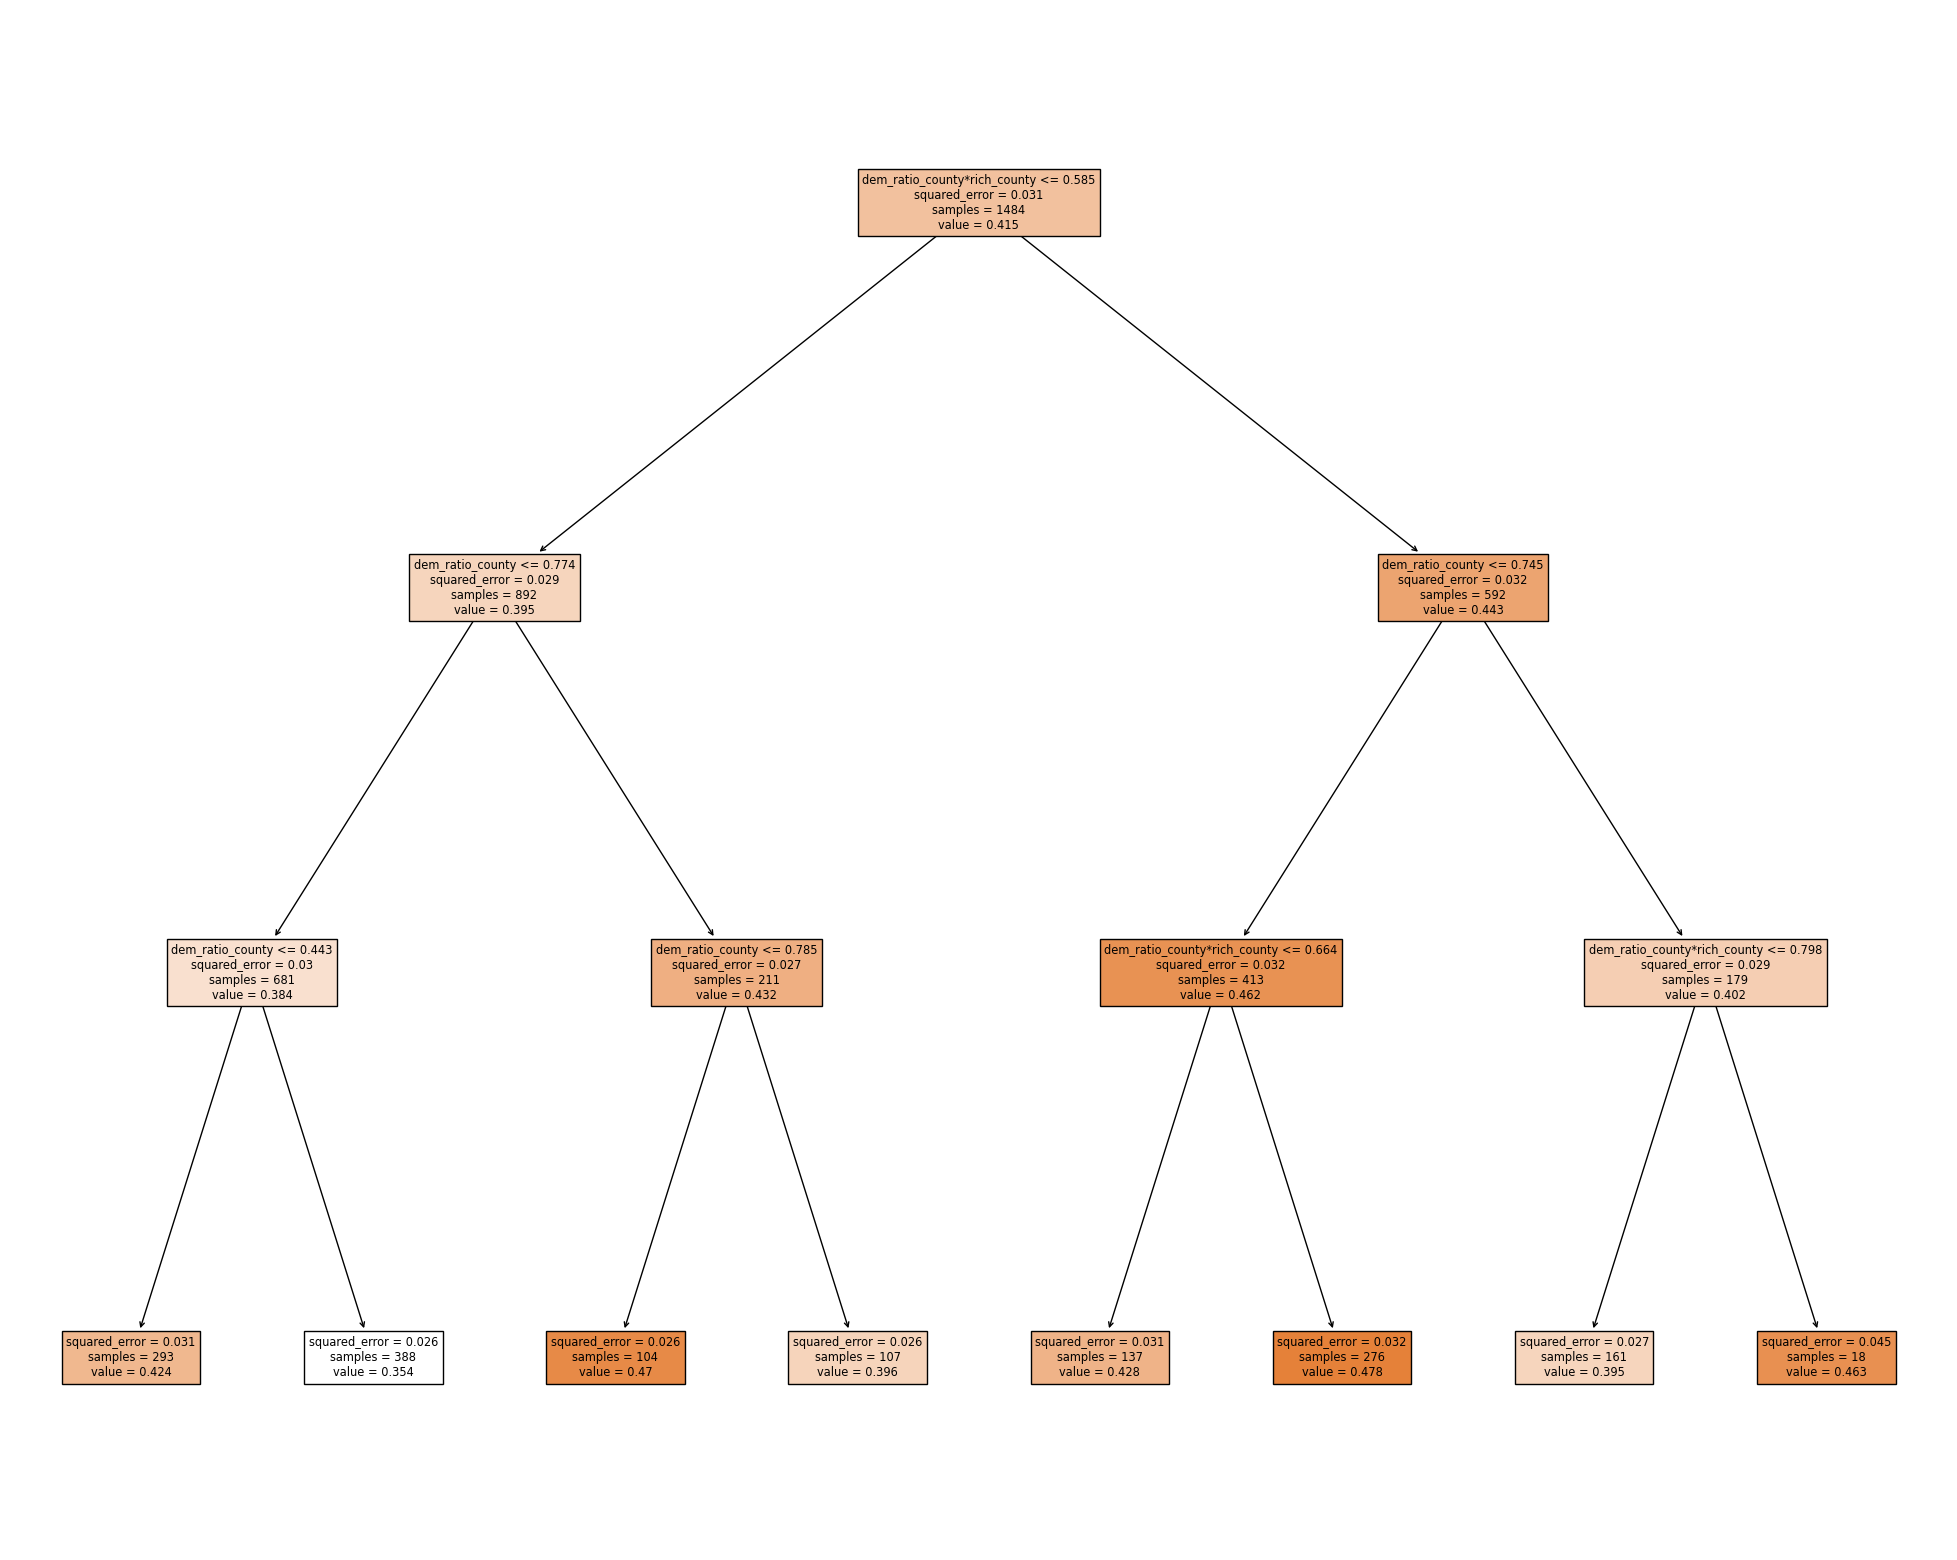

In [91]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Define the target variable as 'biden_vote_share_county'
# Define the predictor variables as 'rich_county' and 'dem_ratio_county'
y = regression_table1_slice['biden_vote_share_county']
X = regression_table1_slice[['rich_county', 'dem_ratio_county*rich_county', 'dem_ratio_county']]

# Reorder the columns of X to have 'rich_county' as the first feature
X = X[['rich_county', 'dem_ratio_county*rich_county', 'dem_ratio_county']]

# Create a Decision Tree Regressor object with a maximum depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the decision tree model using the predictor variables and target variable
tree_reg.fit(X, y)

# Plot the decision tree model
plt.figure(figsize=(25,20))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error
# Load the 'regression.csv' file into a pandas dataframe called 'data'
data = pd.read_csv('/Users/kelseycui/Desktop/regression.csv')

# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Define the target variable as 'biden_vote_share_county'
# Define the predictor variables as 'dem_ratio_county' and 'rich_county'
y = regression_table1_slice['biden_vote_share_county']
X = regression_table1_slice[['dem_ratio_county', 'rich_county']]

# Create a Decision Tree Regressor object with a maximum depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the decision tree model using the predictor variables and target variable
tree_reg.fit(X, y)

# Compute the predicted values for the training data
y_pred = tree_reg.predict(X)

# Compute the mean squared error of the decision tree model
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.029091569487737945


In [93]:
data = regression_table1_slice[['county', 'biden_vote_share_county', 'dem_ratio_county', 'intercept', 'rich_county','safe_county']].dropna()
data

,county,biden_vote_share_county,dem_ratio_county,intercept,rich_county,safe_county
0,Acad,0.191486,0.746885,1,0,1.0
1,Alfa,0.102564,0.729805,1,0,1.0
2,Alle,0.364399,0.744246,1,0,1.0
3,Alle,0.296084,0.744246,1,0,1.0
4,Alle,0.261153,0.744246,1,0,1.0
...,...,...,...,...,...,...
1481,Wood,0.129094,0.454545,1,1,1.0
1482,Wood,0.129094,0.772727,1,1,1.0
1483,Wood,0.129094,0.763649,1,1,1.0
1484,Wort,0.283997,0.644076,1,1,1.0


## Summary Statistics Tables

In [95]:
#Use 'describe()' to see the summary statistics of Democratic predential candidate vote share over states \
#and Democratic house candidates vote share over states
merged_table_state.describe()

,total_votes_x,total_votes_y,biden_vote_share,dem_house_share
count,1.400000e+01,1.400000e+01,14.000000,14.000000
mean,1.977686e+06,3.970233e+06,0.480823,0.489692
std,1.388181e+06,2.837418e+06,0.061003,0.020045
min,1.149020e+05,3.618190e+05,0.317568,0.452638
25%,9.769640e+05,2.082392e+06,0.480426,0.484500
50%,1.760714e+06,3.342339e+06,0.494746,0.488682
75%,2.631627e+06,5.393030e+06,0.504798,0.495270
max,5.297045e+06,1.106746e+07,0.554000,0.530515


In the summary statistic table of the Democratic presidential candidate vote share and Democratic House, candidates' vote share in all 14 moderate states, where the Democratic vote share is between 0.45 to 0.55. From this table, we can see that Democratic House candidates' vote shares, in terms of the 25th and 50th percentile, are higher than that of President Biden. Joe Biden only outperformed the Democratic House candidates in terms of the 75th percentile in moderate states. It indicates that Democratic House candidates performed overall better than Democratic presidential candidate Biden in 2020 in moderate states. We can infer that the Democratic party's popularity contributes more than Joe Biden's charisma in the US election in 2020, which contradicted the hypothesis proposed by some people.

In [96]:
#Use 'describe()' to see the summary statistics of Democratic predential candidate vote share over counties\
#and Democratic senate candidates vote share over counties
merged_table_county.drop(columns=['county_total_votes_x', 'dem_total_votes', 'county_biden_votes', \
                                  'county_total_votes_y']).describe()

,biden_vote_share_county,dem_ratio_county
count,1484.000000,1486.000000
mean,0.414520,0.626005
std,0.176191,0.166789
min,0.053856,0.200301
25%,0.283203,0.493971
50%,0.405535,0.677419
75%,0.532936,0.767279
max,0.882546,0.799854


In the summary statistic table of the Democratic presidential candidate vote share and Democratic Senate candidate vote share by county, in all 14 moderate states, where Democratic vote share is between 0.45 to 0.55. From this table, we can see that Democratic Senate candidates' vote shares, in terms of 25th, 50th, and 75th percentile, are higher than that of President Biden in counties of moderate states. It indicates that Democratic Senate candidates performed overall better than Democratic presidential candidate Biden in 2020 in moderate states. It indicates that Democratic House candidates performed better than Democratic presidential candidate Biden. We can infer that the Democratic party's popularity contributes more than Joe Biden's charisma in the US election in 2020, which contradicted the hypothesis proposed by some people

## Plots, Histograms and Figures

### First investigation: 

As for the first investigation, we are going to represent Democratic Party’s popularity by its vote share in the U.S. House race by state. Since we already have the Y variable, `the Democratic presidential candidate's performance`, plus the first X variable, `Democratic Party's popularity`, then we could figure out whether it is President Biden’s charisma for moderate voters or the popularity of the Democratic Patry that put Joe Biden in the White House, by comparing Biden's vote share and the Democratic Party’s Senate candidates' vote share by county. (If you find it difficult to understand the reasoning behind it, please go back to the introduction to review the example to illustrate such reasoning.)


Let's take a look at the president candidates total votes first.

In [153]:
#Find the total votes of each president candidates
total_votes = \
president_county_candidate.groupby('candidate')['total_votes']
total_votes = total_votes.sum().reset_index().sort_values(by='total_votes',ascending=False) 
df = total_votes.sort_values(by='total_votes')

#Draw a bar chart to compare president candidate's total votes
fig1 = px.bar(df, x='total_votes', y='candidate', orientation='h')
fig1.update_layout(template='simple_white')
fig1 = fig1.update_layout(title='Total Votes of Each President Candidate', template='simple_white', height=700)
fig1.show()


We can see the votes are extremely concentrated from the above bar chart. Democratic presidential candidate Joe Biden and Republican presidential candidate Donald Trump are taking the overwhelming majority of total votes of all US votes in 2020. One point should be noticed is other candidate's bars looks to zero is because their votes are too few to be displayed in this bar chart compared with Biden and Trump. Their votes are not zero, they are just too small. 

Based on that fact, in the following investigation, votes toward other presidential candidates would be ignored. In other words, we think voters would go for either the Democratic party or the Republican party. For example, if people don't vote for Democratic senate candidates, then they vote for Republican senate candidates.

Let's compare `Biden's vote share` over the defined moderate states and `Democratic house candidate's vote share` over moderate states in the following histogram. 

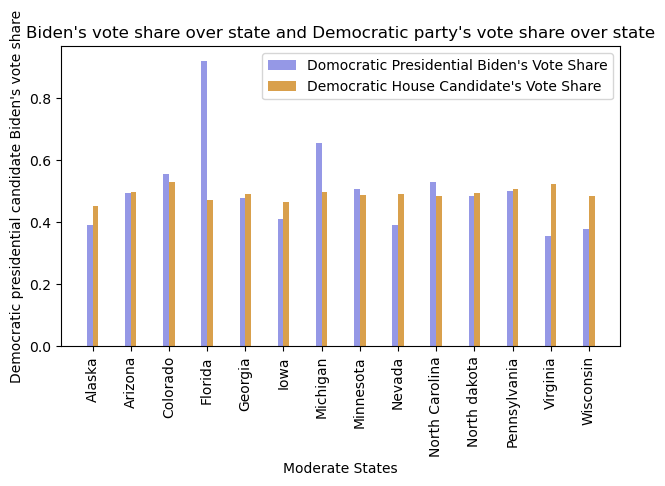

In [161]:
means_biden_win_share = (0.391993, 0.493647, 0.554000,0.921497,0.478615,0.409632,0.656001,\
                         0.506208,0.391668,0.528226,0.485862,0.499609,0.356053,0.376460)
means_dem_house_share = (0.452638,0.498529,0.530515,0.472269,0.489994,0.465637,0.495803,\
                         0.487370,0.490943,0.485674,0.493671,0.505585,0.522858,0.484108)
n_groups = len(means_biden_win_share)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.15

color_biden = mplc.hsv_to_rgb((0.66, 0.35, 0.9))
rects1 = ax.bar(
    index, means_biden_win_share, bar_width, color=color_biden, label="Domocratic Presidential Biden's Vote Share"
)

color_dem = mplc.hsv_to_rgb((0.10, 0.65, 0.85))
rects2 = ax.bar(
    index + bar_width, means_dem_house_share, bar_width, color=color_dem, label="Democratic House Candidate's Vote Share"
)

ax.set_xlabel('Moderate States')
ax.set_ylabel("Democratic presidential candidate Biden's vote share")
ax.set_title("Biden's vote share over state and Democratic party's vote share over state")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Alaska','Arizona','Colorado','Florida','Georgia','Iowa','Michigan','Minnesota', 'Nevada','North Carolina','North dakota','Pennsylvania','Virginia', 'Wisconsin'],rotation=90 )
ax.legend()

fig.tight_layout()


In this histogram, we are trying to compare the vote share of the Democratic `presidential candidate` Biden vote share with the Democratic `House candidate's` vote share by state. This could help us infer the other X variable that we are trying to find out, which is the impact of Biden's personality and charisma in the 2020 election among moderate voters.

As we said previously Biden's performance in the 2020 election is the Y variable, determined by two X variables, his charisma and the popularity of the Democratic Party. This plot shows the comparison between the Y variable, the Democratic presidential candidate's vote share, and one of the X variables, the popularity of the Democratic Party. As we can see in the graph, the Democratic presidential vote share is lower Democratic house vote share, so given Y variable is lower than one of the X variables, then we could infer that the other X variable, Biden's charisma, is lower than Y variable and the X variable representing popularity of the democratic Party.

To vertify, if they have a linear relationship, let's check the scatter plot.Note that the line on the scatter plot is not the regression line, it exists with the purpose of recognizing which one has more quantity of support between Presidential candidate and House candidates in moderate states.

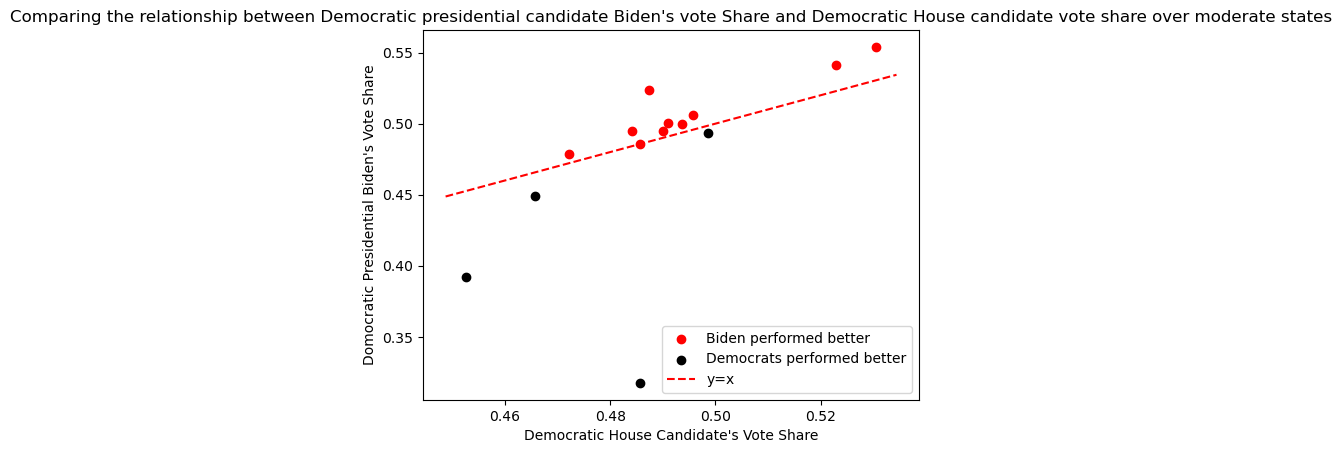

In [191]:
fig, ax = plt.subplots()

# Create a boolean column to identify points in A or B
merged_table_state['group'] = np.where(merged_table_state['dem_house_share'] >= merged_table_state['biden_vote_share'], 'B', 'A')

# Create a dictionary to map group values to colors and labels
colors = {'A': 'red', 'B': 'black'}
labels = {'A': 'Biden performed better', 'B': 'Democrats performed better'}

# Create a scatter plot for each group, specifying the color and label
for group in ['A', 'B']:
    df = merged_table_state[merged_table_state['group'] == group]
    ax.scatter(df['dem_house_share'], df['biden_vote_share'], c=colors[group], label=labels[group])

ax.set_xlabel("Democratic House Candidate's Vote Share")
ax.set_ylabel("Domocratic Presidential Biden's Vote Share")
ax.set_title("Comparing the relationship between Democratic presidential \
candidate Biden's vote Share and Democratic House candidate vote share over moderate states")

# Add the line y = x to help us infer the result illustrated in the following. 
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')

# Add a legend for the group labels and colors
ax.legend(loc='lower right')

plt.show()


From the graph above, we can see that most scatter points spread above the line y = x, and only a few are below the line. The observation is opposite with our hypothesis. The difference can be conlcuded as the amount of sample is too few to represent the truth. As a matter of fact, among most moderate states, Biden's vote share is lower than that of Democratic congressional candidates. It should tell that Biden's performance does not have that much positive influence on moderate voters in 2020 compared to the popularity of the Democratic party.

To successfully infer that the Democratic party itself rather than Biden is the main reason for the Democrats winning in the 2020 presidential election, we need larger amount of samples. Before doing the larger sample, let's take a look of the boxplot based on this sufficient data.  

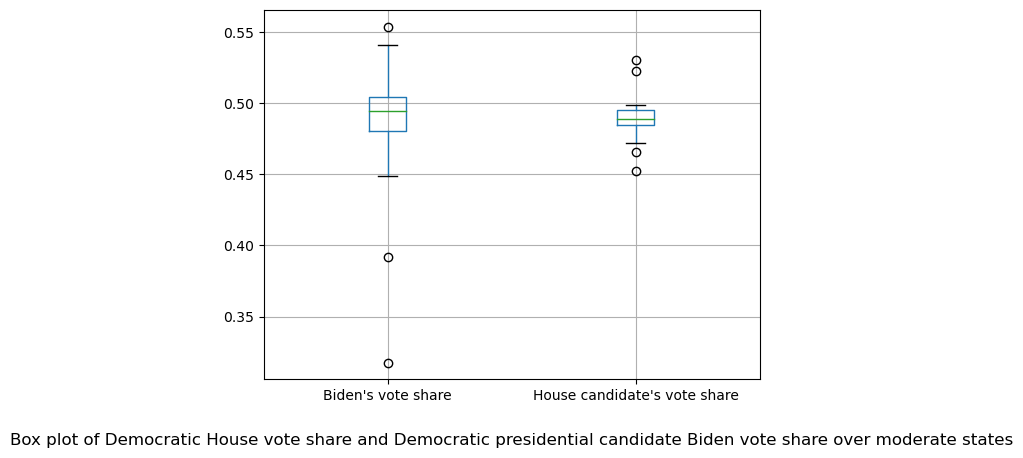

In [192]:
df = merged_table_state_boxplot.boxplot()
df.set_title('Box plot of Democratic House vote share and Democratic presidential candidate \
Biden vote share over moderate states', y=-0.2)
plt.xticks([1, 2], ["Biden's vote share", "House candidate's vote share"])

plt.show()

From this boxplot, we can see that the Democratic party's overall popularity, represented by the median of vote shares of all Democratic House candidates by state, is slightly lower than the median of Democratic presidential candidate's vote shares by state. It tells the insufficiency of this investigation due to lack of more samples. If we are given sufficient amount of samples and we smoothly conclude the realistic conclusion, which is the Democratic party itself rather than Biden is the main reason for the Democrats winning in the 2020 presidential election, the underlying economic reasons are expained as following.

In 2020, America was under the COVID-19 pandemic, and American people tolerated grievous illness and economic inactivity. However, the current president Donald Trump did not improve the situation. It made the majority of Americans think that the US needs a new president as a capable leader who could successfully handle this crisis. In terms of healthcare and economic recovery, this new president is expected to expand access to healthcare and make it more affordable. Additionally, this new president’s economic recovery plan is supposed to address the economic issue comprehensively, including measures to support small businesses, provide relief to those affected by the pandemic, and invest in science, infrastructure, and clean energy. Moreover, the unemployment rate in the working class was also expected to rise due to the pandemic. The new president should focus on the working class’s rights and how to improve their minimum wages through investing their job training and related education. 

Currently, this new president was most likely to be moderate, capable of addressing these economic issues and reuniting the United States. Democratic presidential candidate Joe Biden just met most Americans’ expectations. Meantime, some Americans just wanted someone other than Donald Trump to be the president, as many American voters think that Donald Trump has done poorly in economics and diplomacy, significantly undermining the standing of the United States. . It’s Democrats that unified all the support and resources around Joe Biden, which made him succeed in the 2020 US election.

What should be pointed out is, people who voted for Joe Biden are from various groups, such as racial minorities, sexual minorities, environmentalists, people who simply want a more prosperous economy, people who wish to restore America’s standing in the world, people who want to strengthen the tie between the U.S. and its allies, people who are loyal to the Democratic party and establishment Republicans who hate Trump. Those people have different preferences and ideologies and could not possibly be attracted to the same candidate. Though Joe Biden is a decent candidate, he can’t attract all the groups of voters listed above on his own. It is the Democratic Party that gathered those groups of people, formed an anti-Trump alliance around Biden and put him in the White House. The reason why Joe Biden has those resources and support is not because of his Democratic presidential nomination, but instead of his charisma. 


### Second investigation

The second investigation is the same thing, but we'll measure the popularity of the candidate's party using a different method. And this time we use larger amount of samples. The popularity of the Democratic Party is represented by the vote share received by Democratic Senate candidates in each county. We can then figure out whether President Biden or the Democratic Party contribute more to their victory in the 2020 presidential election, by comparing Biden's vote share and Democratic vote share in the Senate elections in each county.

What we observed from the following graph is similar to the first situation. For most of the scatter points lying under the line y = x, less than half points go beyond that line. The graph proved that the number of counties with the condition of President Biden's performance is better than the Democratic Senator candidate's performance is slightly less than the number of counties with the opposite condition.

In [185]:
#Remove outliners and the unrealistic data to reduce the error. 
correct = merged_table_county.loc[merged_table_county['dem_ratio_county'] < 0.7]
correct.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes,dem_ratio_county,color
13,Ante,452,3583,0.126151,751,354.0,0.471372,black
15,Appl,478,915,0.522404,7685,3414.0,0.444242,red
17,Appl,1784,8390,0.212634,7685,3414.0,0.444242,black
18,Arth,21,285,0.073684,63,21.0,0.333333,black
21,Atki,2299,5277,0.435664,2782,1525.0,0.548167,black


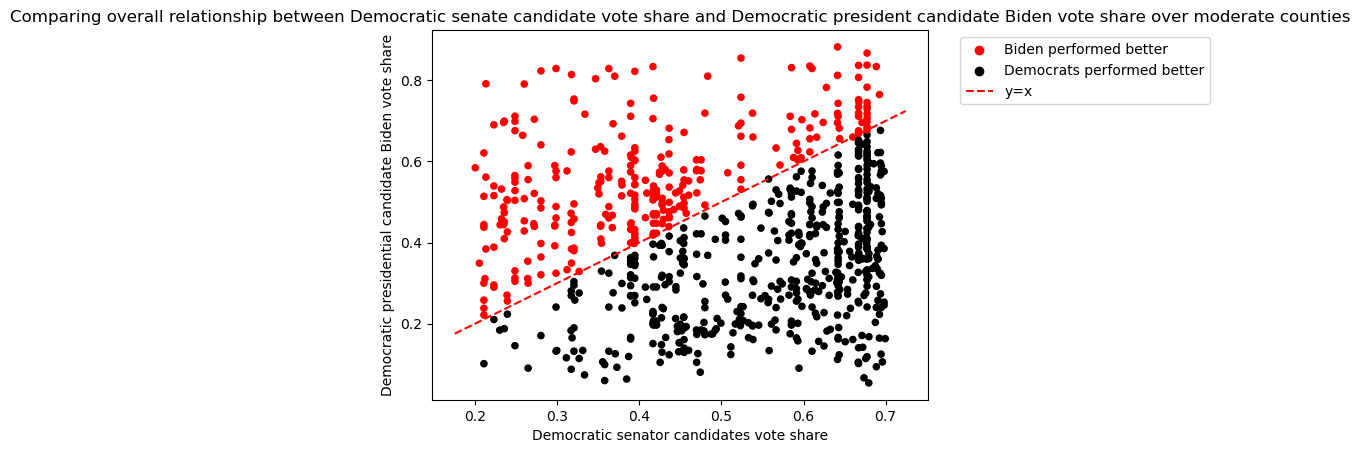

In [184]:
# Visualize the relationship between Democratic senator candidates vote ratio over county 
#and Democratic presidential candidate Biden's vote share over moderate counties using a scatter plot
correct = correct.copy()
correct['color'] = 'red'
correct.loc[correct['dem_ratio_county'] > correct['biden_vote_share_county'], 'color'] = 'black'
ax = correct.plot(x='dem_ratio_county', y='biden_vote_share_county', kind='scatter', c=correct['color'])

ax.scatter([],[], c='red', label='Biden performed better')
ax.scatter([],[], c='black', label='Democrats performed better')

ax.set_xlabel('Democratic senator candidates vote share')
ax.set_ylabel('Democratic presidential candidate Biden vote share')
plt.title('Comparing overall relationship between Democratic senate candidate vote share \
and Democratic president candidate Biden vote share over moderate counties')

#Add the auxiliary line y = x 
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')

# Place legend outside the plot to the right
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

From the perspective of realistic data, in the following boxplot, we can observe that the mean of President Biden's vote share over moderate counties is still lower than the mean of Democratic senator candidates' vote share over moderate counties (the green line in each box). In conclusion, President Biden's performance did not mainly make himself the American President but the Democratic party. 

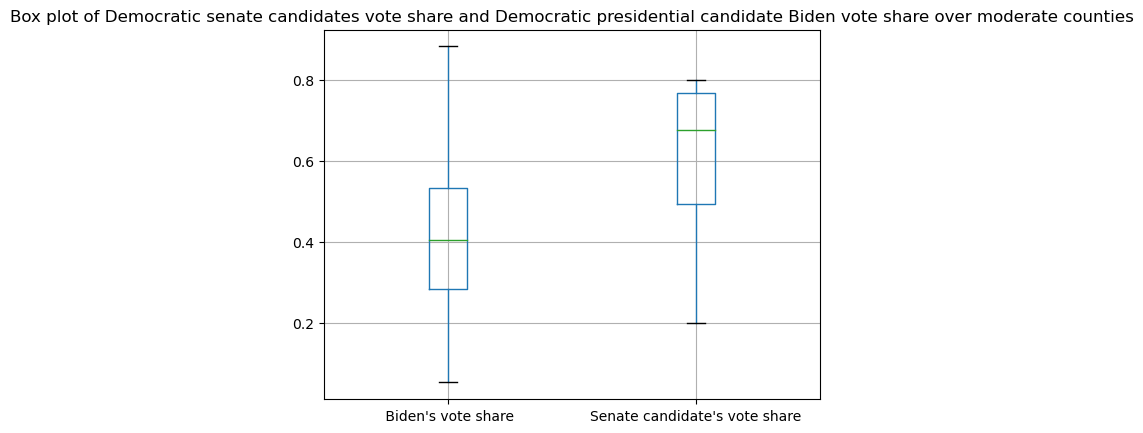

In [101]:
merged_table_county.drop(columns=['county_total_votes_x', 'dem_total_votes', 'county_biden_votes', 'county_total_votes_y']).boxplot()

plt.xticks([1, 2], [" Biden's vote share", "Senate candidate's vote share"])

plt.title('Box plot of Democratic senate candidates vote share and Democratic presidential \
candidate Biden vote share over moderate counties')
plt.show()


Based on the analysis we conducted in the second investigation, we conclude the same result that the popularity of the Democratic party was getting more credit than President Biden's charisma in the final result of the 2020 U.S. election. 



# Project 2

## The Message

We are trying to investigate whether President Biden himself or the Democratic Party contribute more to attracting moderate voters in the 2020 presidential election. Based on our findings in project one, we can come to a preliminary conclusion that it is the Democratic party that boosts votes for President Biden in the 2020 presidential election, not the other way around. Joe Biden is not more acceptable for moderate voters than the average Democrat. Democratic Party, instead of President Biden himself, should take more credit for Democrats’ winning in the 2020 presidential election. In project 2, we are going to dig into the details using more plots or histograms. Additionally, are going to visualize our data on maps to analyze the question from a geographical perspective. Moreover, we are going to analyze the question by subgroups, in this case, we divide all the 14 moderate states into ‘rich states’ of which GDP per capita is higher than the average of the U.S. and ‘poor states’ of which GDP per capita is lower than the average of the U.S. This should give us some insight from a socio-economic perspective. 

We divide all the 14 moderate states into ‘rich states’ of which GDP per capita is higher than the average of the U.S. and ‘poor states’ of which GDP per capita is lower than the average of the U.S. This should give us some insight from socio-economic perspective.

The first histogram displays the 12 poor moderate states.

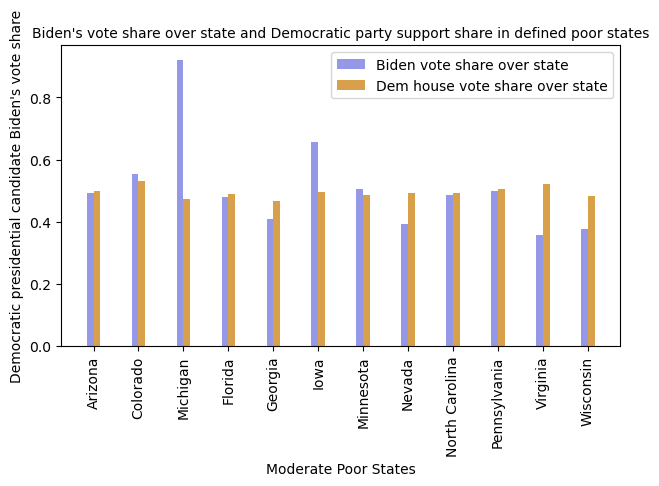

In [187]:
means_biden_win_share = (0.493647, 0.554000,0.921497,0.478615,0.409632,0.656001,\
                         0.506208,0.391668,0.485862,0.499609,0.356053,0.376460)
means_dem_house_share = (0.498529,0.530515,0.472269,0.489994,0.465637,0.495803,\
                         0.487370,0.490943,0.493671,0.505585,0.522858,0.484108)
n_groups = len(means_biden_win_share)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.15

color_biden = mplc.hsv_to_rgb((0.66, 0.35, 0.9))
rects1 = ax.bar(
    index, means_biden_win_share, bar_width, color=color_biden, label='Biden vote share over state'
)

color_dem = mplc.hsv_to_rgb((0.10, 0.65, 0.85))
rects2 = ax.bar(
    index + bar_width, means_dem_house_share, bar_width, color=color_dem, label='Dem house vote share over state'
)

ax.set_xlabel('Moderate Poor States')
ax.set_ylabel("Democratic presidential candidate Biden's vote share" )
ax.set_title("Biden's vote share over state and Democratic party support share in defined poor states",fontsize=10)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Arizona','Colorado','Michigan','Florida','Georgia','Iowa','Minnesota', 'Nevada','North Carolina','Pennsylvania','Virginia', 'Wisconsin'],rotation=90 )
ax.legend()

fig.tight_layout()


#ax.set_xticklabels(['Alaska','Arizona','Colorado','Florida','Georgia','Iowa','Michigan','Minnesota', 'Nevada','North Carolina','North dakota','Pennsylvania','Virginia', 'Wisconsin'],rotation=90 )

The second histogram displays the 2 rich states, which means their GDP per capita is lower than the country average.

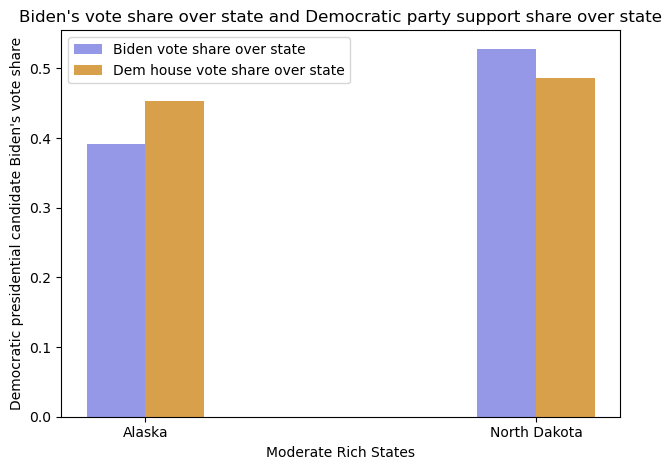

In [103]:
means_biden_win_share = (0.391993, 0.528226)
means_dem_house_share = (0.452638, 0.485674)
n_groups = len(means_biden_win_share)
fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.15

color_biden = mplc.hsv_to_rgb((0.66, 0.35, 0.9))
rects1 = ax.bar(
    index, means_biden_win_share, bar_width, color=color_biden, label='Biden vote share over state'
)

color_dem = mplc.hsv_to_rgb((0.10, 0.65, 0.85))
rects2 = ax.bar(
    index + bar_width, means_dem_house_share, bar_width, color=color_dem, label='Dem house vote share over state'
)

ax.set_xlabel('Moderate Rich States')
ax.set_ylabel("Democratic presidential candidate Biden's vote share")
ax.set_title("Biden's vote share over state and Democratic party support share over state")
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(['Alaska', 'North Dakota'])
ax.legend()

fig.tight_layout()


In the two histograms above, we can see a comparison of House Democratic candidates’ vote share and President Biden’s, both in moderate ‘poor’ states and moderate ‘rich’ states. From our histograms, we can find that among 12 ‘poor’ states, Joe Biden outperformed House Democratic candidates in only four states. In the two moderate ‘rich’ states, Joe Biden outperformed House Democratic candidates in one state. So statistically speaking, Joe Biden is more popular in ‘rich’ moderate states than in ‘poor’ moderate states. But the sample size is relatively small, so we are not able to make a relatively reliable judgment on that. 

## Maps and Interpretations

In the two maps presented following, we showed the vote share of President Biden and House Democratic candidates in all 14 moderates states. Thus, we can compare their vote share and analyse our research question from geographical perspective.

In [193]:
#Draw the map display moderate states democats vote. 
fig = px.choropleth(df_president_state_moderate, 
                    locations="usa_state_code_x", 
                    color = "percent_democrat",
                    locationmode = 'USA-states', 
                    hover_name="state",
                    range_color=[25,75],
                    color_continuous_scale = 'RdBu',
                    scope="usa",
                    title='2020 USA Election: Percent of Population Voting for the Democratic Party in moderate states')
fig.update_layout(coloraxis_colorbar=dict(title='Percent of voting for Democrats')) #Since it's an interactive map, once the cursor on the state, 
#it would show the state name. But pdf doesn't allow people to do that.

In [188]:
#Draw the map displayed democratic house candidates vote share in moderate state
fig = px.choropleth(merged_df, 
                    locations="usa_state_code", 
                    color="dem_house_share", 
                    locationmode = 'USA-states', 
                    hover_name="usa_state",
                    range_color=[0.45,0.55],
                    scope="usa",
                    title='2020 USA Election: Democratic House Candidate Votes share in moderate states',
                    color_continuous_scale=px.colors.sequential.Blues) 

fig.update_layout(coloraxis_colorbar=dict(title='Democratic House Candidate Votes share')) 
#Since it's an interactive map, once the cursor on the state, 
#it would show the state name. But pdf doesn't allow people to do that.

In the two maps presented above, we showed the vote share of President Biden and House Democratic candidates in all 14 moderate states. Thus, we can compare their vote share and analyze our research question from a geographical perspective. 

In the map, we can find out that the five states where Joe Biden outperformed House Democratic candidates are Michigan, Wisconsin, Pennsylvania, Georgia, and Nevada. **For those five states, Biden performed better than average Democrats because of his charisma toward certain groups of people or certain industries**. 

Regards to Michigan, Wisconsin, and Pennsylvania, all belong to the “Rust Belt”, where workers in the manufacturing industry take up a large proportion of the population. As someone who grow up in a working-class family in Pennsylvania, Joe Biden could naturally connect to the worker class in the ‘Rust Belt’ states and gain their support. 

As for Georgia, the proportion of African Americans is very large, Joe Biden has always been doing good among black voters, even compared to average Democrats, so it is not hard to understand why Biden outperformed House Democrats in Georgia. 

Regarding Nevada, it is possible that Joe Biden’s pledge to invest a very large amount in clean energy, as Nevada has an advantage in the clean energy industry. It is likely that Nevada is more favorable of Joe Biden because of his industrial policies. **However, for all nine other states, Joe Biden performed worse than House Democratic candidates, which means if Joe Biden’s popularity is not boosted for special reasons, like demographics, then his popularity is lower than the overall popularity of the Democratic Party.**

# Project 3

## potential data to scrape

To explore the data to scrape, we need to define the investigation goal firstly. There is a hypothesis that Joe Biden is an appealing candidate for working-class voters (Williams, 2021). So we introduced the statistics on per capita income for all counties in the United States, obtained from the website https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income, to find out whether this hypothesis is true.

We combined this dataset with the data on Republican vote share by county. Subsequently, we categorized all US counties into two groups, namely 'rich counties' with per capita income exceeding the national average, and 'poor counties' with per capita income below the national average, and merged them.

 This allowed us to investigate whether Joe Biden's popularity relative to that of the Democratic Party is associated with the socio-economic status of the county. By comparing Biden's performance relative to the Senate Democrats in both rich and poor counties, we analyzed his influence from a socio-economic perspective, thereby enhancing our report. Consequently, we were able to determine whether the quality of the candidate or the popularity of the party was the primary factor in the Democrats' victory in the 2020 presidential election.

The plan is to use the conventional method to web scrapting the data of per capita income of US counties and merge it with tables with Vote situations so that we can compare the relationship between affluence and 
the variables that we're investigating. 

## Potential Challenges

When retrieving data from a source, there may be certain challenges that need to be addressed. In the present study, the data extracted from Wikipedia appears to contain numerous columns that may be relevant to the research question; however, it remains uncertain which specific columns are most appropriate for the intended analysis. It is advantageous that the program does not require frequent updates, given that all data pertaining to the 2020 presidential election has been fixed. While the researcher is able to acquire the necessary data from the source, there remains a need to develop a methodology for integrating the original data with the organically-scraped data.

To overcome challenge, we need to use our economic knowledge to determine which indicator is the most appropriate for our research topic. In this case, we believe it is per capita income. 


## Scraping Data from a Website

Firstly, we are requesting for the web content for the Wiki webpage related to US income per capita by county with the URL - https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income. 

In [189]:
url = "https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income"
html = requests.get(url).content
soup = BeautifulSoup(html)
table = soup.find_all("table")[2] # select the third table on the page

This code reads in data from an HTML table using Pandas' read_html() function. Firstly, the HTML table is converted to a string using str(data_table) so that it can be passed as an argument to read_html(). The resulting DataFrame contains population density data for US counties. And then we selects only the 'County' and 'Per capita income' columns from the DataFrame using loc.

In [148]:
Income_per_capita = pd.read_html(str(table))[0] # convert the table to a pandas dataframe
Income_per_capita = Income_per_capita.rename(columns={'County or county-equivalent': 'county'})
Income_per_capita = Income_per_capita.loc[:, ['county', 'Per capitaincome']]
Income_per_capita.head()

,county,Per capitaincome
0,New York County,"$76,592"
1,Arlington,"$62,018"
2,Falls Church City,"$59,088"
3,Marin,"$56,791"
4,Santa Clara,"$56,248"


From this table we can clearly see the income per capita by county in US from data of 2021. That's a success web scraping and we can use it to merge with other tables. 

## Merging the Scraped Dataset

Since we're comparing Biden's performance relative to the Senate Democrats in both rich and poor counties, now a table with Democratic president candidate Biden's vote share, Domocratic house candidate's vote share and income per capita in moderate counties should be combined in one table. That's what the following table displays.

In [198]:
Income_per_capita_slice = Income_per_capita
Income_per_capita_slice['county'] = Income_per_capita['county'].str.slice(stop=4)

new_merge = pd.merge(dem_ratio_filtered_slice, Income_per_capita_slice, on='county', how='outer')

biden_votes_share_county_slice = biden_votes_share_county
biden_votes_share_county_slice['county'] = biden_votes_share_county_slice['county'].str.slice(stop=4)

final_merge = pd.merge(biden_votes_share_county_slice, new_merge, on='county', how='outer')
final_merge.loc[:, ['county', 'biden_vote_share_county', 'dem_ratio_county', 'Per capitaincome']].dropna().head()


,county,biden_vote_share_county,dem_ratio_county,Per capitaincome
206,Ante,0.126151,0.471372,"$25,186"
211,Appl,0.522404,0.444242,"$19,643"
212,Appl,0.212634,0.444242,"$19,643"
230,Arth,0.073684,0.333333,"$17,656"
256,Atki,0.435664,0.548167,"$15,958"


In [112]:
final_merge.count()

county                     13631
county_biden_votes         13506
county_total_votes_x       13506
biden_vote_share_county    13495
county_total_votes_y        6993
dem_total_votes             6993
dem_ratio_county            6993
Per capitaincome           13094
dtype: int64

We simply count all observations of table final_merge, 1485 observations are left after merging all data, which is a sufficiant data amount to help us get a meaningful conclusion. Compared with previous table, we lose some rows because the scraped data doesn't contain all counties. To prevent the missing values, the final result has been dropped missing values. 

## Visualizing the Scraped Dataset

The scatter plot is an effective way to illustrate vote situation in moderate rich or poor counties. Every points represents a county. The points above the line y=x is marked as red and being explained as Biden garnered a greater share of the vote compared to Senate Democrats, and vice versa. 

The initial scatter plot incorporates all rich counties. Results indicate that, in the majority of rich counties, Biden's performance was less favorable in contrast to that of Senate Democratic candidates. Conversely, the subsequent scatter plot encompasses all poor counties, where points positioned above the y=x line represent counties where Biden's vote share surpassed that of Senate Democrats. Findings suggest that Biden's performance did not markedly differ from that of other Democratic Senate candidates. 


When we did the same thing to the defined poor counties, we had the same conclusion. 

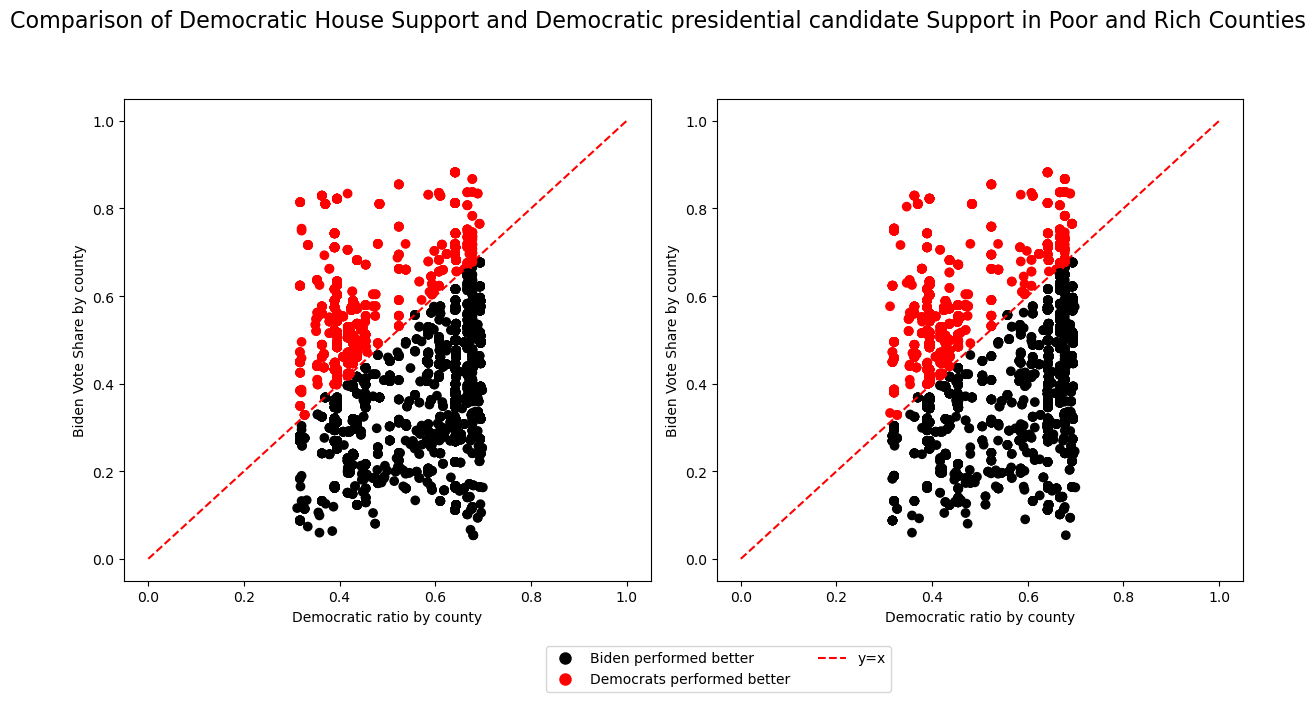

In [114]:
from matplotlib.lines import Line2D

# create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# define x as an array of values from 0 to 1 with a step size of 0.01
x = np.arange(0, 1.01, 0.01)

# plot the first scatter plot on the left subplot
poor_county = poor_county[['dem_ratio_county', 'biden_vote_share_county']].copy()
poor_county['color'] = np.where(poor_county['dem_ratio_county'] >= poor_county['biden_vote_share_county'], \
                                'black', 'red')
axs[0].scatter(poor_county['dem_ratio_county'], poor_county['biden_vote_share_county'], c=poor_county['color'])
axs[0].plot(x, x, color='red', linestyle='--')
axs[0].set_xlabel('Democratic ratio by county')
axs[0].set_ylabel('Biden Vote Share by county')
#axs[0].set_title('Scatter plot of democratic house candidate vote share and Biden vote share by county in defined poor counties')

# plot the second scatter plot on the right subplot
rich_county = rich_county[['dem_ratio_county', 'biden_vote_share_county']].copy()
rich_county['color'] = np.where(rich_county['dem_ratio_county'] >= rich_county['biden_vote_share_county'], 'black', 'red')
axs[1].scatter(rich_county['dem_ratio_county'], rich_county['biden_vote_share_county'], c=rich_county['color'])
axs[1].plot(x, x, color='red', linestyle='--', label='y=x')
axs[1].set_xlabel('Democratic ratio by county')
axs[1].set_ylabel('Biden Vote Share by county')
#axs[1].set_title('Scatter plot of democratic house candidate vote share and Biden vote share by county in defined rich counties')

# add a suptitle
fig.suptitle('Comparison of Democratic House Support and Democratic presidential candidate Support in Poor and Rich Counties', fontsize=16, y=1.05)

# add a legend to explain the colors
# add a legend to explain the colors and line
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Biden performed better', markerfacecolor='black', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='Democrats performed better', markerfacecolor='red', markersize=10),
                   Line2D([0], [0], linestyle='--', color='red', label='y=x')]
fig.legend(handles=legend_elements, bbox_to_anchor=(0.7, 0), ncol=2)

# adjust the spacing between the subplots
fig.tight_layout()

# move the subplots downward by 0.1
fig.subplots_adjust(top=0.9)

# display the plot
plt.show()


It should be noted that we are not analyzing any linear or nonlinear relationship among these scatter points. Rather, we are simply observing whether the county had a higher vote share for Biden or for Democrats. The y=x line separates these points: the red points represent the states where Biden performed better, while the black points represent the states where Democrats performed better. Additionally, because of the comparision of two scatters, it's more reasonable to combine them together.  

Consequently, it is plausible that the widespread popularity of the Democratic party was more instrumental in securing Biden's victory during the 2020 election, rather than his individual appeal. Additionally, the data indicate that Biden's relative slightly unpopularity among rich counties, compared to average Democrats, may represent a potential weakness relative to other Democratic candidates.

## Adding a New Dataset

Some advocates of President Biden claim that the President is more popular in rural areas which helped the Democratic Party win the 2020 presidential election (Nadeem, 2022). In this section, we picked moderate U.S. counties that are considered as rural area according to the U.S. Bureau of Census, to examine whether Biden had boosted Democratic votes in rural areas. Through the use of two scatter plots, we analyzed the relationship between Biden's vote share and that of Senate Democrats in both urban and rural counties. In the urban counties scatter plot, observations above the line of equality indicate instances in which Biden outperformed Senate Democrats, while those below the line indicate instances where he underperformed. For rhe rural counties scatter plot, the same applies. 


We have incorporated a new dataset on the population density of US counties and utilized it to distinguish between rural areas (less the population density mean) and urban areas (more than the population density mean). 

In [115]:
#Firstly, we use web scrapting to obtain the data we need
density_url = "https://github.com/balsama/us_counties_data/blob/main/data/counties.csv"
response = requests.get(density_url)
soup_object = BeautifulSoup(response.content, 'html.parser')
data_table = soup_object.find_all('table', {'class': 'js-csv-data csv-data js-file-line-container'})[0]
population_density = pd.read_html(str(data_table))[0]
population_density = population_density.loc[:, ['County', 'Density']]
population_density = population_density.rename(columns={'County': 'county'} )
population_density.head()

,county,Density
0,Autauga County,99
1,Baldwin County,151
2,Barbour County,28
3,Bibb County,36
4,Blount County,92


In [116]:
#And then we use the mean of population desity to seprate what is rural and urban areas
rural_area = county_density_scatter.loc[county_density_scatter['Density'] < 386] #386 is the average of the population density 
rural_area.head()

,county,county_biden_votes,county_total_votes_x,biden_vote_share_county,county_total_votes_y,dem_total_votes_x,dem_ratio_county_x,county_total_votes,dem_total_votes_y,dem_ratio_county_y,Density
0,Ante,452,3583,0.126151,751,354.0,0.471372,751,354.0,0.471372,7
1,Appl,1784,8390,0.212634,7685,3414.0,0.444242,7685,3414.0,0.444242,36
2,Arth,21,285,0.073684,63,21.0,0.333333,63,21.0,0.333333,1
3,Atki,825,3155,0.261490,2782,1525.0,0.548167,2782,1525.0,0.548167,25
4,Baco,625,4667,0.133919,3527,1168.0,0.331160,3527,1168.0,0.331160,39


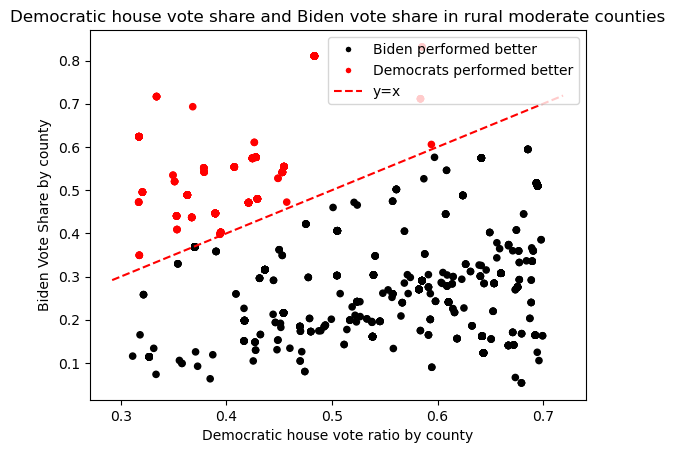

In [151]:
# Draw the scatter plot for the rural area
# Remove the assignment of `x` and `y`, use double brackets to select multiple columns
rural_area = rural_area[['dem_ratio_county_x', 'biden_vote_share_county']].copy()  
rural_area['color'] = np.where(rural_area['dem_ratio_county_x'] >= rural_area['biden_vote_share_county'], 'black', 'red')
ax = rural_area.plot(x='dem_ratio_county_x', y='biden_vote_share_county', kind='scatter', c=rural_area['color'])
ax.set_xlabel('Democratic house vote ratio by county')
ax.set_ylabel('Biden Vote Share by county')
plt.title('Democratic house vote share and Biden vote share in rural moderate counties')
x = np.linspace(*ax.get_xlim(), num=100)
ax.plot(x, x, color='red', linestyle='--', label='y=x')
plt.legend(handles=[Line2D([0], [0], marker='o', color='w', label='Biden performed better', markerfacecolor='black', markersize=5),
                    Line2D([0], [0], marker='o', color='w', label='Democrats performed better', markerfacecolor='red', markersize=5),
                    Line2D([0], [0], linestyle='--', color='red', label='y=x', markersize=5)])
plt.show()



Based on this scatter plot, our analysis of the rural counties scatter plot reveals no significant differences between Biden's vote share and that of Senate Democrats, implying that Biden did not promote or hinder the performance of the Democratic Party compared to average Democrats in the 2020 presidential election.Based on our analysis, we conclude that Joe Biden did not promote the Democratic Party in rural areas during the 2020 presidential election.


## Final project

### OLS Regression

In this section, we are going to use regresion to analyze several variables' effect on the result, including crime rate, per capita income, Democratic Senate vote share and employment.Totally four regressions are presented here including one simple regression and three interaction effect models.The three interaction regressions investigate the impact of affluence, safety, and the employment to Biden's support in counties.  

#### First regression: **`biden_vote_share_county = 0.4105+ 0.0065* dem_ratio_county`**  

The first regression we are using is a simple regression with X = demorats support ratio in counties and Y = Biden support ratio in counties.

In [118]:
regression_table1 = regression_table1.dropna().copy()  # create a copy of the DataFrame
regression_table1.loc[:, 'intercept'] = [1] * len(regression_table1)  # use .loc to modify the copy

In [119]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [206]:
reg1 = sm.OLS(endog=regression_table1['biden_vote_share_county'], exog=regression_table1[['dem_ratio_county', 'intercept']],
             missing = 'drop')
res1 = reg1.fit()
stargazer = Stargazer([res1])
HTML(stargazer.render_html())

The present regression analysis demonstrates a linear association between two variables, namely the Democratic presidential vote share and the Democratic Senate vote share. The regression equation indicates that a one percentage point increase in the Democratic House vote share is associated with an increase in the Democratic presidential vote share by 0.006 percentage points. The intercept term of 0.410 indicates that if the Democratic Senate vote share is zero, the predicted Democratic presidential vote share would be 0.442. The negative regression coefficient of 0.006 signifies an positive correlated relationship between the two variables, indicating that an increase in the Democratic Senate vote share is related to an increase in the Democratic presidential vote share. It is important to note that this regression analysis only shows a correlation between the variables and does not provide evidence of a causal relationship.

The result of this regression may appear to be counterintuitive, as many people natuarally think that President Biden's vote share should have a strong correlation with Democratic Senate vote share. However, it is important to note that correlation does not necessarily imply causation, and there may be other factors that could affect the relationship between the two variables.

One plausible explanation for the observed results of the regression analysis is the inadequate representation of the majority of potential Democratic voters. This may be attributed to the concentration of registered Democrats in urban and suburban counties, which comprise only a small fraction of all counties in the United States. Additionally, a significant portion of U.S. counties is rural and tends to be dominated by Republican voters, which potentially disturbs the outcome of the regression analysis. The results of this regression analysis suggest that the Democratic Party may need to do more to appeal to rural voters in order to win elections.


#### Second regression: **`Democratic Presidential Vote Share = 0.442 + (-0.067)(Democratic Senate Vote Share)+ 0.171(Democratic Senate Vote Share *rich_county) + (-0.080)(rich_county)`**

In this regression, we add the dummy variable rich_county and the interaction of rich_county and Democratic Senate Vote share to investigate the effect of affluence of counties towards Democratic presidential vote share. 

In [208]:
# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise
regression_table1_slice['rich_county'] = (regression_table1_slice['county'].isin(poor_county['county']).astype(int))

# include dem_ratio_county and its interaction with rich_county in the exog matrix, along with an intercept
regression_table1_slice['interaction'] = regression_table1_slice['rich_county'] * regression_table1_slice['dem_ratio_county']
exog = sm.add_constant(regression_table1_slice[['rich_county', 'dem_ratio_county', 'interaction']])

# run the regression with the updated exog matrix
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()

# print the results using stargazer
stargazer = Stargazer([res1])
HTML(stargazer.render_html())


The presented regression model aims to predict the Democratic presidential vote share based on two predictors - the Senate Democratic vote share and a dummy variable representing rich_county. The rich_county variable is set to 1 when the county is considered rich.

The intercept, set at 0.3843, represents the expected value of the Democratic presidential vote share when the Democratic Senate vote share is zero and the county is not rich. The coefficient for the Democratic Senate vote share, at -0.0673, denotes the anticipated decline in the Democratic presidential vote share for every one-unit increase in the Democratic Senate vote share, while the number of wealthy individuals in the county is held constant.

The coefficient for the rich_county variable, -0.0804, estimates the expected reduction in the Democratic presidential vote share when the county is categorized as "rich," relative to a county that is not deemed "rich," when the Democratic Senate vote share and the interaction term are constant. The interaction term between the Democratic Senate vote share and rich_county, 0.1712, signifies the expected increase in the Democratic presidential vote share for every one-unit increase in the Democratic Senate vote share in a "rich" county, compared to a county that is not considered "rich."

In summary, the model shows that the Democratic presidential vote share is dependent on both the Democratic Senate vote share and whether the county is rich. Moreover, the effect of the Democratic Senate vote share on the Democratic presidential vote share is influenced by the per capita income of the county. The model also reveals that being in a "rich" county has a negative effect on the Democratic presidential vote share, but this effect is counteracted by the presence of a higher Democratic Senate vote share. This may be because voters in rich counties are more likely to be satisfied with their economic situation and therefore less likely to support a party that is perceived as being more likely to raise taxes and regulate businesses. Additionally, voters in rich counties may be more likely to identify with the Republican Party, which has traditionally been seen as the party of business and economic growth.


#### Third regression: **`Democratic Presidential Vote Share = 0.429 -0.001*(Democratic Senate Vote Share) + 0.062*(Democratic Senate Vote Share * safe_county) -0.034* *safe_county`**

In the third regression,we add the safe_county as the dummy variable and the interaction of Democratic Senate Vote Share and safe_county to explore the relationship between safety situation of counties and Democratic Presidential Vote Share in these counties. 

In [212]:
# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Check for zero values in predictor variables
if (regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']] == 0).any().any():
    regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']] += 1e-8

# Add constant to the predictor variables
exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'safe_county']])

# Fit the OLS model
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')
res1 = reg1.fit()

# Print the summary of regression results
# print the results using stargazer
stargazer = Stargazer([res1])
HTML(stargazer.render_html())


The presented regression model aims to predict the Democratic presidential vote share based on two predictors - the Senate Democratic vote share and a dummy variable representing safe_county. The safe_county variable is set to 1 when the county is considered safe.

The intercept value of 0.429 represents the expected Democratic presidential vote share when both the Senate Democratic vote share and safe_county are zero. The coefficient for the Senate Democratic vote share, set at -0.010, suggests that for every unit increase in the Senate Democratic vote share, the predicted Democratic presidential vote share will decrease by 0.010, holding safe_county constant.

The coefficient for the interaction term between the Senate Democratic vote share and safe_county, 0.2225, measures the impact of the Senate Democratic vote, share on the Democratic presidential vote share when the county is safe compared to when it is not safe. The negative sign indicates that the effect of the Senate Democratic vote share on the Democratic presidential vote share is reduced in safe counties compared to non-safe counties.

The coefficient for the safe_county variable, -0.034, estimates the difference in the expected Democratic presidential vote share between safe and non-safe counties, controlling for the Senate Democratic vote share and the interaction term.

Overall, the regression model indicates that both the Senate Democratic vote share and safe_county are significant predictors of the Democratic presidential vote share. The effect of the Senate Democratic vote share on the Democratic presidential vote share is weakened in safe counties compared to non-safe counties. Additionally, the model suggests that safe counties are associated with a slightly higher expected Democratic presidential vote share, after accounting for the Senate Democratic vote share and the interaction term. This may be because voters in safe counties are more likely to feel secure in their jobs and their homes, and therefore more willing to take risks on a new candidate. Additionally, voters in safe counties may be more likely to identify with the Democratic Party, which has traditionally been seen as the party of social welfare and economic security.


#### Fourth regression: **`Democratic Presidential Vote Share = 0.4104 + 0.0065 * （Democratic Presidential Vote Share）  +0.0004*(Democratic Presidential Vote Share * less_employed) + 0.0004 *less_employed`**

In this regression, the new dummy variable is added in:less_employed. It's 1 if the county's unemployment rate is lower than the median of unemployment rate in US and 0 if vice versa. 

In [218]:
# create a new column for the dummy variable, with 1s for a specific condition and 0s otherwise
regression_table1_slice['more_employed'] = (regression_table1_slice['county'].isin(unemployment_more['Area_name']).astype(int))

regression_table1_slice['interaction'] = regression_table1_slice['more_employed'] * regression_table1_slice['dem_ratio_county']
exog = regression_table1_slice[['more_employed', 'dem_ratio_county', 'interaction']]


exog = sm.add_constant(regression_table1_slice[['dem_ratio_county', 'interaction', 'more_employed']])
exog = exog + 0.001 # Adding a small constant value to avoid division by zero
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'], exog=exog, missing='drop')

# run the regression with the dummy variable included
reg1 = sm.OLS(endog=regression_table1_slice['biden_vote_share_county'],exog=exog,missing='drop')
res1 = reg1.fit()

stargazer = Stargazer([res1])
stargazer.covariate_order(['dem_ratio_county', 'more_employed', 'interaction', 'const'])
stargazer.significant_digits(4)
HTML(stargazer.render_html())



The regression model you described aims to predict the Democratic presidential vote share based on two predictors: the Senate Democratic vote share and a dummy variable representing more_employed_county. The more_employed_county variable is set to 1 when the county has a higher level of employment.

The intercept value of 0.4104 represents the expected Democratic presidential vote share when both the Senate Democratic vote share and more_employed_county are zero. This means that, on average, counties with a Senate Democratic vote share of 0% and a more_employed_county value of 0% are expected to have a Democratic presidential vote share of 41.04%.

The coefficient for the Senate Democratic vote share, set at -0.0065, indicates that for every unit increase in the Senate Democratic vote share, the predicted Democratic presidential vote share will decrease by -0.0056, holding more_employed_county constant.

The coefficient for the interaction term between the Senate Democratic vote share and more_employed_county, -0.0004, measures the impact of the Senate Democratic vote share on the Democratic presidential vote share when the county has a higher level of employment compared to when it does not. The negative sign indicates that the effect of the Senate Democratic vote share on the Democratic presidential vote share is reduced in more employed counties compared to less employed counties. This means that, for a given Senate Democratic vote share, the expected Democratic presidential vote share will be lower in more employed counties than in less employed counties.

The coefficient for the more_employed_county variable, 0.0004, estimates the difference in the expected Democratic presidential vote share between more employed and less-employed counties. This means that, on average, counties with a more_employed_county value of 1 are expected to have a Democratic presidential vote share that is 0.0004 points higher than counties with a more_employed_county value of 0.

Overall, this regression model indicates that both the Senate Democratic vote share and more_employed_county are significant predictors of the Democratic presidential vote share. The effect of the Senate Democratic vote share on the Democratic presidential vote share is weaker in more employed counties compared to less employed counties. Additionally, the model suggests that more employed counties are associated with a higher expected Democratic presidential vote share, after accounting for the Senate Democratic vote share and the interaction term.

One possible economic explanation for these results is that voters in more employed counties are more likely to be satisfied with the economic conditions in their county and, therefore, less likely to vote for a Democratic candidate who is perceived as being more likely to raise taxes and regulate businesses. Additionally, voters in more employed counties may be more likely to identify with the Republican Party, which has traditionally been seen as the party of business and economic growth.


### Machine Learning

This regression tree is used to predict Biden's vote share in a county based on two predictor variables: the Democratic Senate vote share (Dem_Ratio_County) and whether the county is considered "rich" or not  (Rich_County).

In the regression tree below, the first split is based on whether the county is considered "rich" or not. The second and third split is based on Democratic Senate vote share (Dem_Ratio_County). 

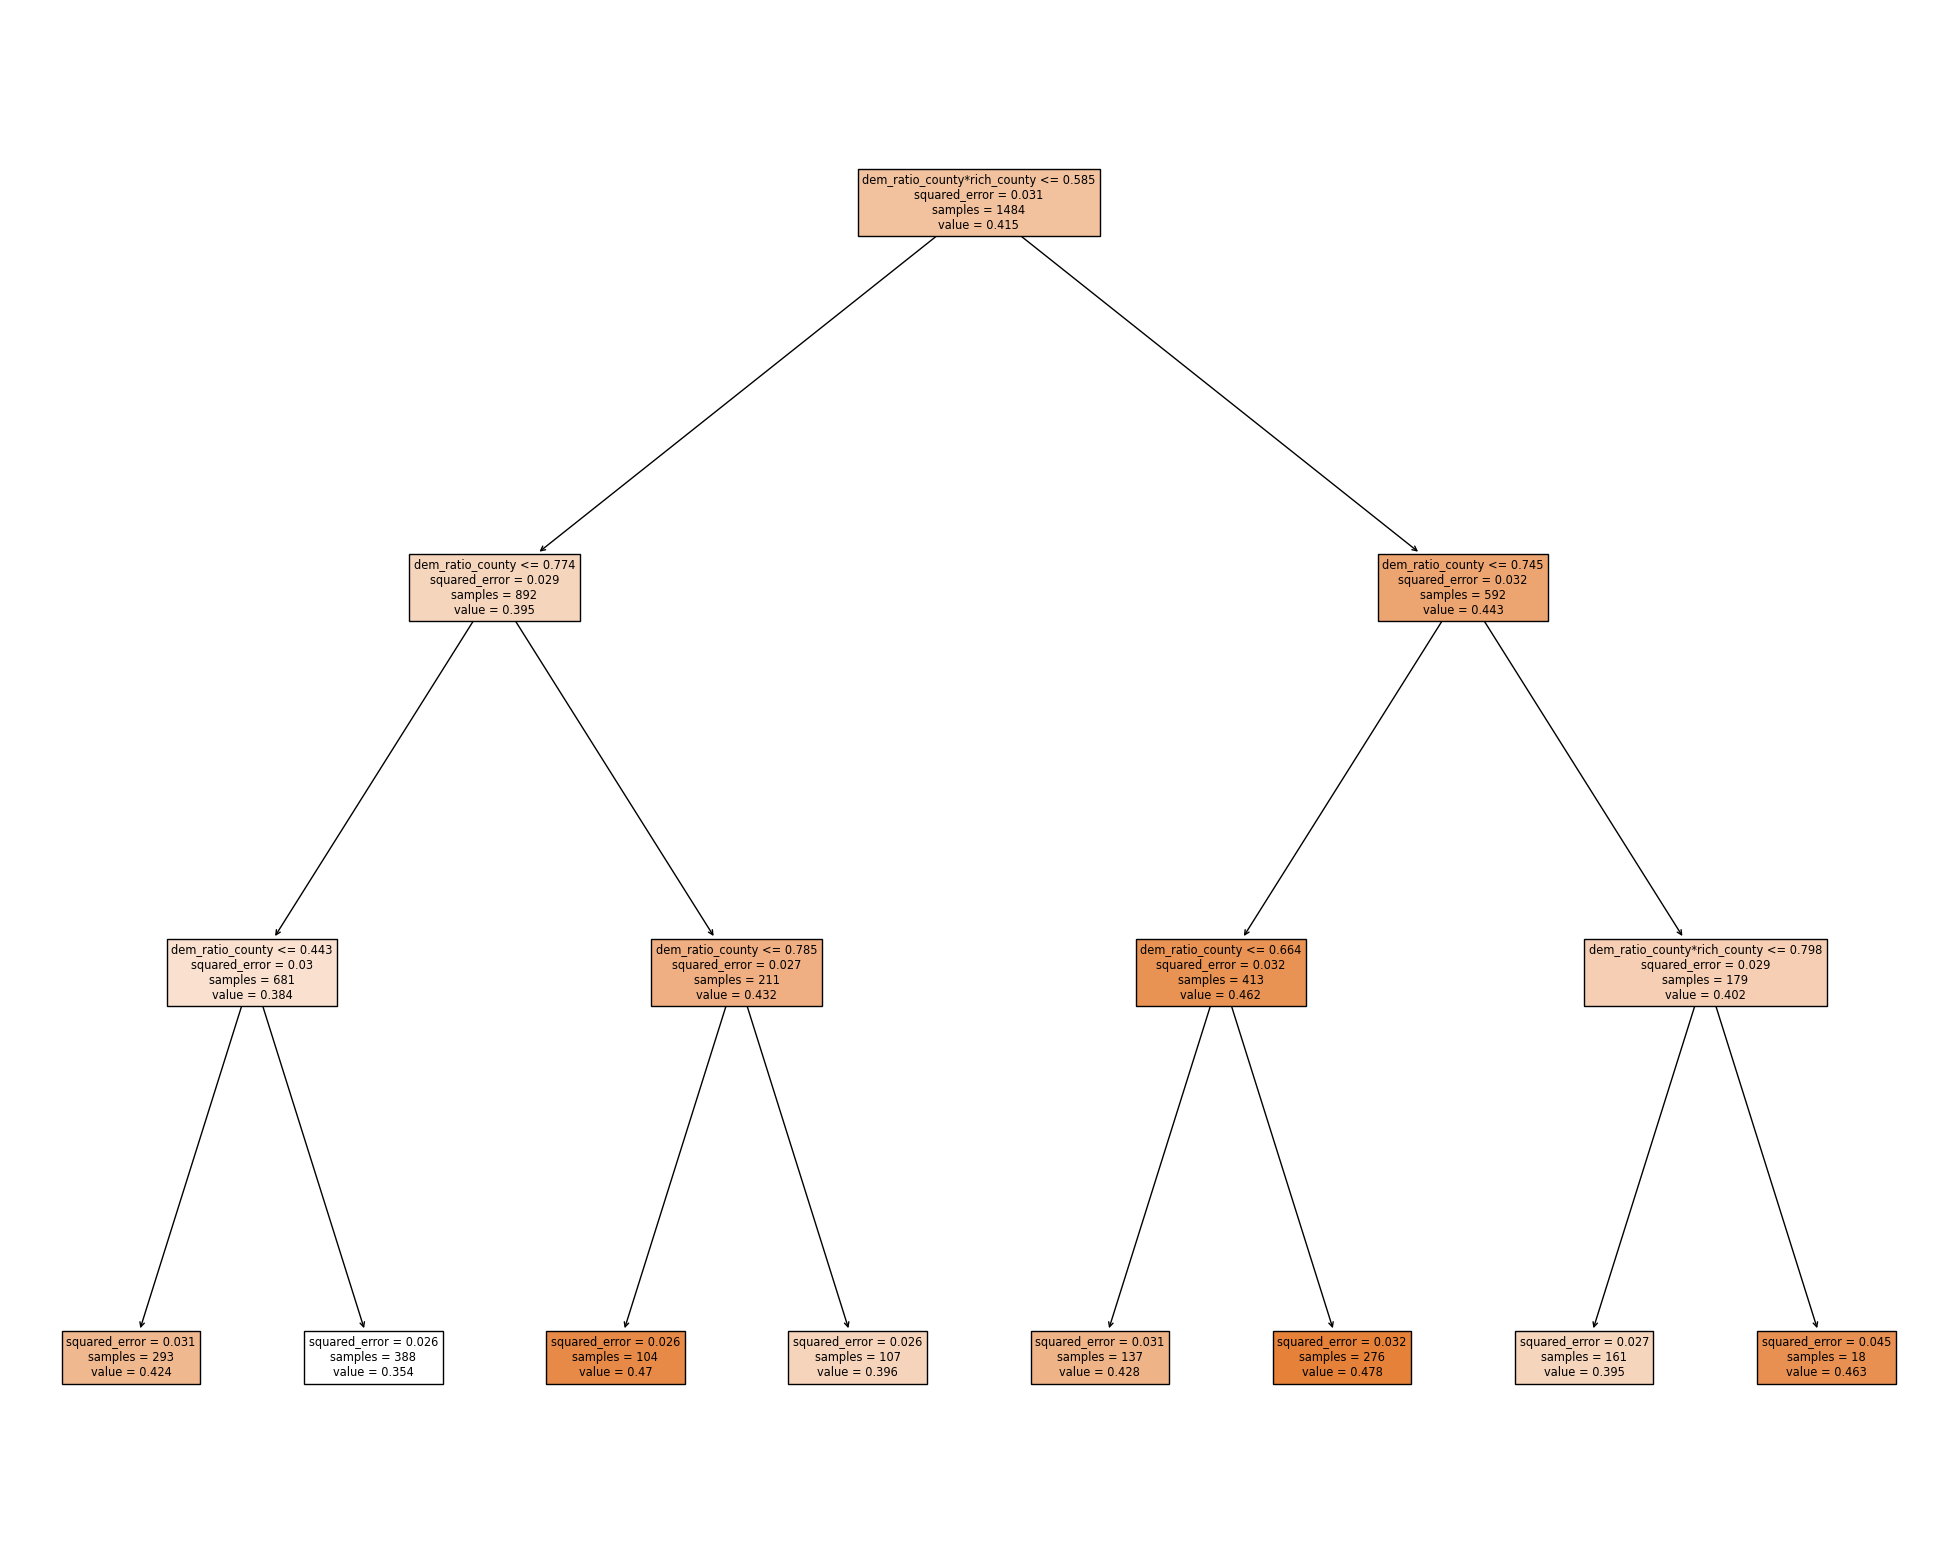

In [219]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Define the target variable as 'biden_vote_share_county'
# Define the predictor variables as 'rich_county' and 'dem_ratio_county'
y = regression_table1_slice['biden_vote_share_county']
X = regression_table1_slice[['rich_county', 'dem_ratio_county*rich_county', 'dem_ratio_county']]

# Reorder the columns of X to have 'rich_county' as the first feature
X = X[['rich_county', 'dem_ratio_county*rich_county', 'dem_ratio_county']]

# Create a Decision Tree Regressor object with a maximum depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the decision tree model using the predictor variables and target variable
tree_reg.fit(X, y)

# Plot the decision tree model
plt.figure(figsize=(25,20))
plot_tree(tree_reg, feature_names=X.columns, filled=True)
plt.show()

For poor counties, if Democratic Senate vote share is less than or equal to 0.774 during the second split, we need to go down by the left branch from there. If the Democratic Senate vote share is lower than or equal to 0.445, the predicted Biden vote share would be 0.446, otherwise it would be 0.346. On the contrary, if Democratic Senate vote share is greater than 0.774 during the second split, we would go down by the right branch from there. If Democratic Senate vote share is less than or equal to 0.785, the predicted Biden share is 0.47, otherwise Biden vote share is predicted to be 0.396. 

In terms of rich counties,  if Democratic Senate vote share is less than or equal to 0.585 during the second split, we need to go down by the left branch from there. If the Democratic Senate vote share is lower than or equal to 0.44, the predicted Biden vote share would be 0.413, otherwise it would be 0.365. On the contrary, if Democratic Senate vote share is greater than 0.745 during the second split, we would go down by the right branch from there. If Democratic Senate vote share is less than or equal to 0.785, the predicted Biden share is 0.462, otherwise Biden vote share is predicted to be 0.402. 


In [220]:
from sklearn.metrics import mean_squared_error
# Load the 'regression.csv' file into a pandas dataframe called 'data'
data = pd.read_csv('/Users/kelseycui/Desktop/regression.csv')

# Drop any rows with missing values
regression_table1_slice = regression_table1_slice.dropna()

# Define the target variable as 'biden_vote_share_county'
# Define the predictor variables as 'dem_ratio_county' and 'rich_county'
y = regression_table1_slice['biden_vote_share_county']
X = regression_table1_slice[['dem_ratio_county', 'rich_county']]

# Create a Decision Tree Regressor object with a maximum depth of 3
tree_reg = DecisionTreeRegressor(max_depth=3)

# Fit the decision tree model using the predictor variables and target variable
tree_reg.fit(X, y)

# Compute the predicted values for the training data
y_pred = tree_reg.predict(X)

# Compute the mean squared error of the decision tree model
mse = mean_squared_error(y, y_pred)

print("Mean Squared Error:", mse)


Mean Squared Error: 0.029091569487737945


The Mean Squared Error (MSE) of 0.0291 indicates that on average, the predicted values from the decision tree model are off by approximately 0.171, which is the square root of the MSE. In other words, the model's predictions have an average squared deviation of 0.0291 from the actual values. As for predicting presidential elections, this MSE is quite large, as the vote share difference between two main candidates in most battle ground counties are within 0.1. So this regression tree is not very accurate when it comes to predicting results, we should not rely on it.

## Conclusion

From the data analyzed and plots drawn in the two investigations, we can see that President Biden performed worse than Democratic Senate candidates in most moderate counties. He also performed worse than the Democratic House candidates in the majority of moderate states. Thus, Joe Biden is weaker than congressional Democrats overall. It is very likely that President Biden's own charisma cannot gain him that many votes, it is the popularity of the Democratic party that pushed up his vote and put him in the White House.

In our several investiagtions, we compared the Democratic party and Biden from different to find out why Democratic Party itself might be more popular. From a socioeconomic perspective, we find that Biden is more popular in ‘rich’ moderate states than in ‘poor’ moderate. However, the sample size is too small, so the result is not necessarily reliable. Thus, we looked into this question at county-level, which could provide us with larger sample size. We found our that Joe Biden overperformed the average Democrats a little in poor counties, but underperformed the overall level of the Democratic Party in rich counties, which is inconsistent with our previus result. But this result is more reliable than the previous one. From a geographical perspective, we visualized our result on the U.S. map, we can see that Biden is more popular in the Rust Belt, Georgia, and Nevada, but is less popular in most moderate states. From a demographic perspective, Joe Biden's  personal appeal did not help the Democratic Party with reagrdw to moderate voters living in rural areas. 

In conclusion, our two investigations show that the popularity of the Democratic party, instead of the quality of the candidate, contributes more to the Democrats' winning in the 2020 presidential election.



# References

Lerer, L., & Epstein, R. J. (2020, October 18). Why these voters rejected Hillary Clinton but are backing Joe Biden. The New York Times.

Kabaservice, G. (2019, April 25). Joe Biden is the Ultimate Centrist Democrat. is that a liability or strength? | Geoffrey Kabaservice. The Guardian.

Nadeem, R. (2022, November 17). Behind Biden's 2020 victory. Pew Research Center - U.S. Politics & Policy.

Williams, J. C. (2021, August 31). How Biden won back (enough of) The White Working Class. Harvard Business Review.
